# Cryogenic LNA scalling 

--------

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
colors = [
    "#FF0000",  # Red
    "#00FF00",  # Lime
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#FF00FF",  # Magenta
    "#00FFFF",  # Cyan
    "#FFA500",  # Orange
    "#800080",  # Purple
    "#008000",  # Green
    "#4682B4"   # Steel Blue
]

### 1. Scaling npn and estimate operation region with gummel plot and with $V_{BE} = V_{CE}$ 

In the open-source PDK of ihp130, we have three different model of npn transistor 
1. ```npn13g2``` with fixed emitter area $0.07 \times 0.9 \mu m^2$
2. ```npn13g2l``` with emitter's width fix  $E_w = 0.07 \mu m$ and varible emitter length $E_l =  [1 - 2.5] \mu m$
3. ```npn13g2v``` with emitter's width fix  $E_w = 0.12 \mu m$ and varible emitter length $E_l =  [1 - 5] \mu m$

### 1.1. First approach, we increase the Emitter in a row ($N_x$) and try to plot their gummel plot. Note that their are some limitation for each model

1. ```npn13g2``` can have maximum 10 emitters for a single transistor
2. ```npn13g2v``` can have maximum 8 emitters for a single transistor
3. 1. ```npn13g2l``` can have maximum 4 emitters for a single transistor

In [3]:
nx_g2 = 10
nx_g2l = 4
nx_g2v = 8

In [4]:
sg13g2 = np.genfromtxt('data_simu/gummel_npn13g2_Nx.txt')
sg13g2 = sg13g2[1:-1]
sg13g2l = np.genfromtxt('data_simu/gummel_npn13g2l_Nx.txt')
sg13g2l = sg13g2l[1:-1]
sg13g2v = np.genfromtxt('data_simu/gummel_npn13g2v_Nx.txt')
sg13g2v = sg13g2v[1:-1]


We first plot the gummel plot for each model. 

Note that in this plot, all transistor's sizing are at **minimum size** 

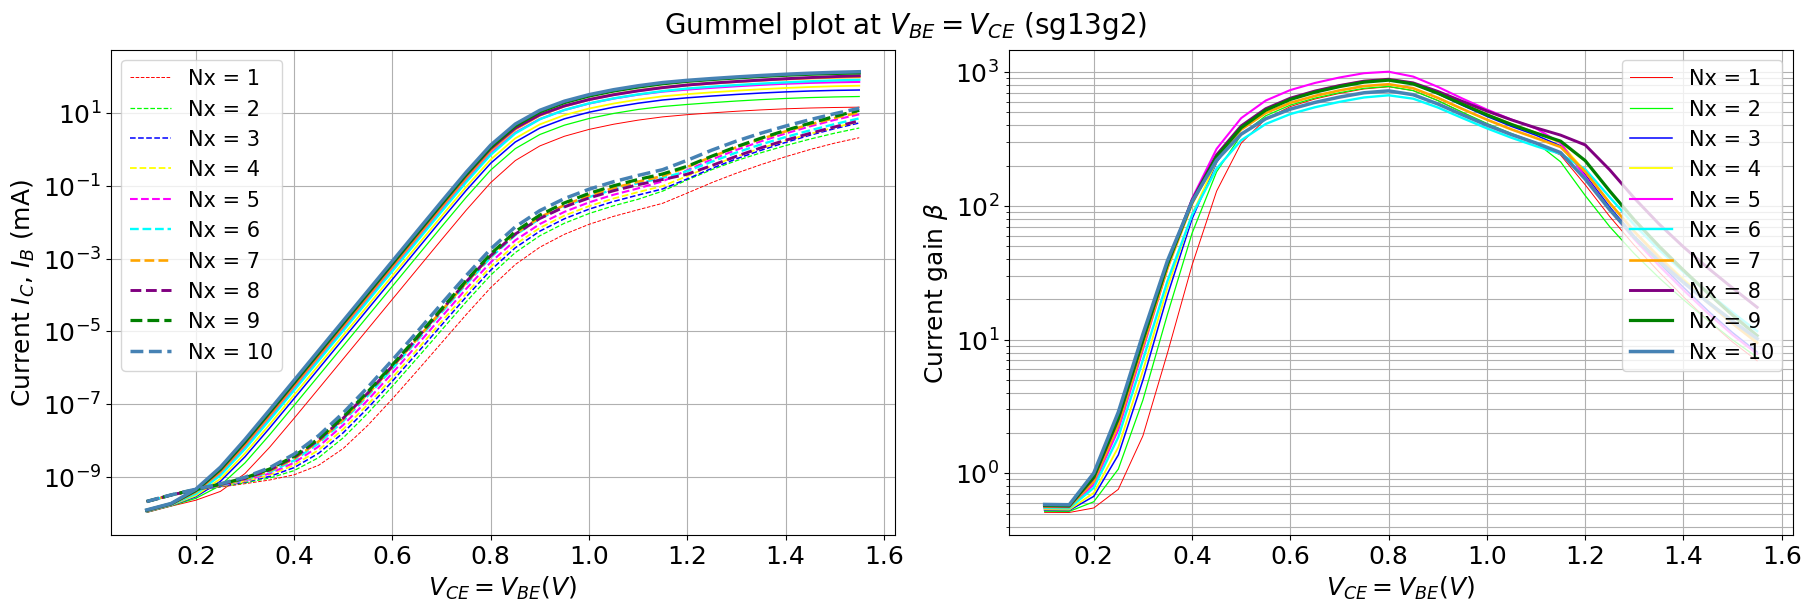

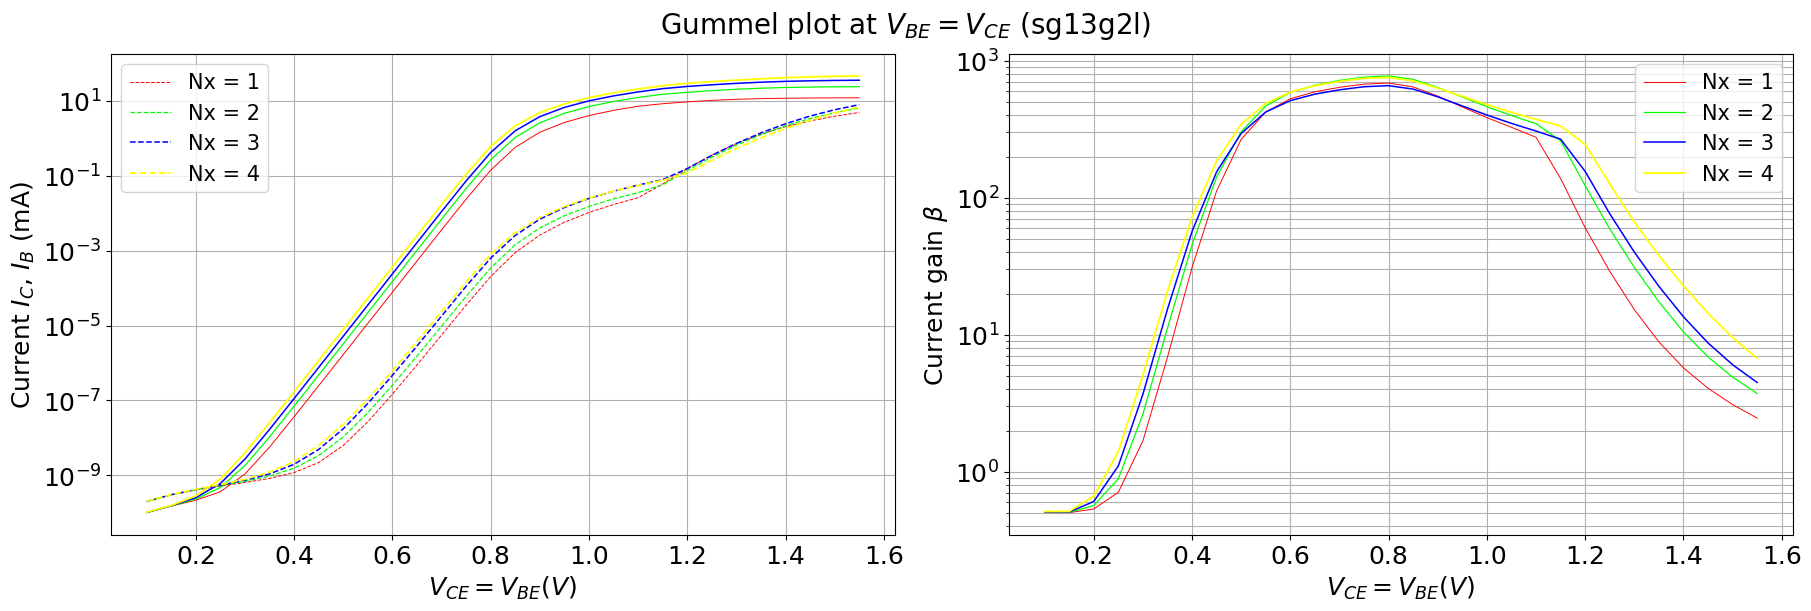

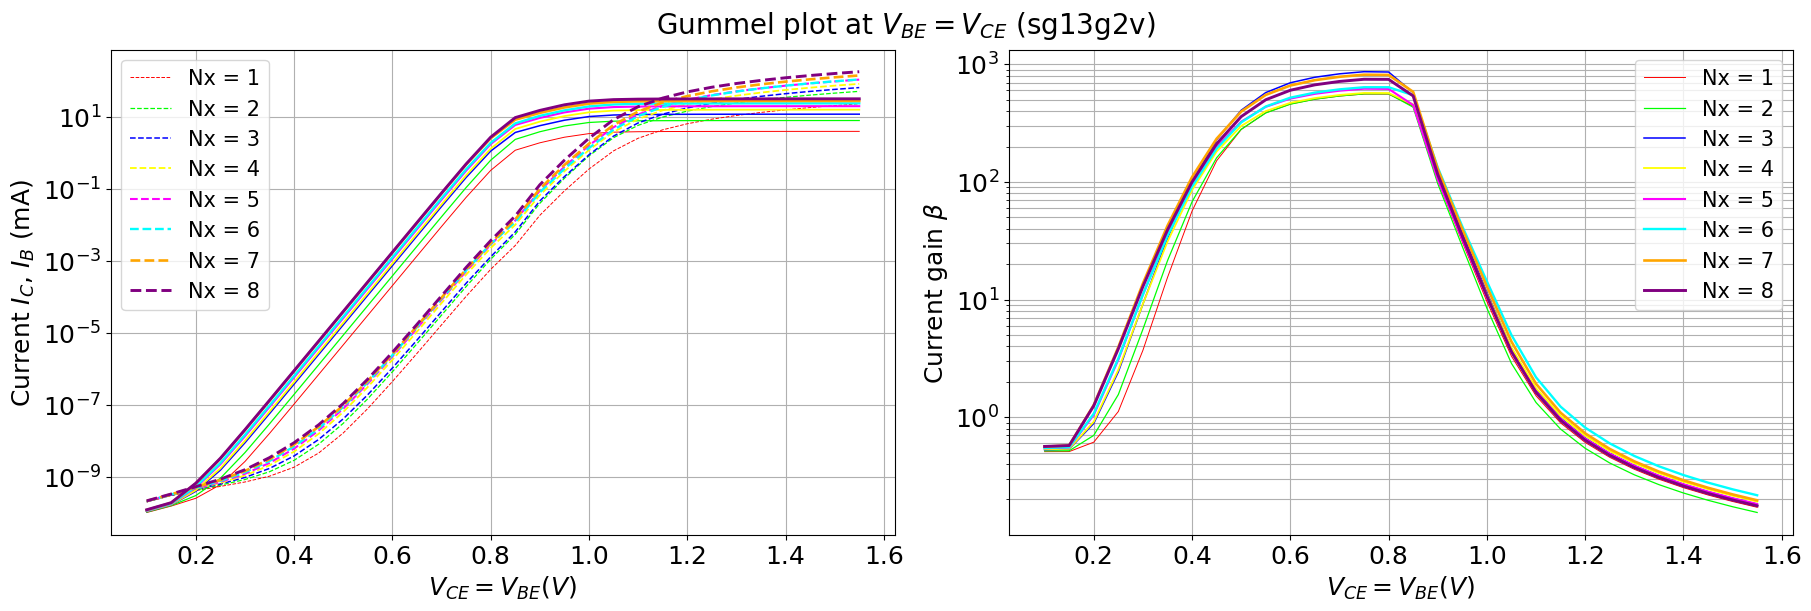

In [5]:
# def plot_dat(data, ind_array, name, size):
#     plt.figure(figsize = size)
#     plt.subplot(211)
#     for i in ind_array:
#         plt.plot(data[:,0], ib1[:,i])
#     plt.plot(data
nx_arr = [nx_g2,nx_g2l,nx_g2v]
dat_arr = [sg13g2,sg13g2l,sg13g2v]
dat_arr_name = ['sg13g2','sg13g2l','sg13g2v']
for j in range(len(nx_arr)):
    plt.figure(figsize = (18,6),constrained_layout=True)
    # plt.title('Bipolar transistor npn13g2',fontsize = 18)
    plt.suptitle(r'Gummel plot at $V_{BE} = V_{CE}$ (%s)'%dat_arr_name[j], fontsize = 20) 
    plt.subplot(121)
    # plt.gca().set_title(f'Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
    for i in range(1,nx_arr[j]+1):
        plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i]*1e3, color = colors[i-1], linestyle = 'dashed', label = f'Nx = {i}', lw = 0.5 + 0.2*i)
        plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i+nx_arr[j]]*1e3, color = colors[i-1], lw = 0.5 + 0.2*i)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current $I_C$, $I_B$ (mA)',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    # plt.xlim(0.75,0.9)
    # plt.ylim(1e-5,15)
    plt.grid(True, which = 'both')
    plt.legend(fontsize = 15, loc = 'upper left')
    plt.subplot(122)
    # plt.gca().set_title('thicker line for higher Nx', fontsize = 20)
    for i in range(1,nx_arr[j]+1):
        plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i+2*nx_arr[j]], color = colors[i-1], label = f'Nx = {i}', lw = 0.5 + 0.2*i)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current gain $\beta$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.legend(fontsize = 15, loc = 'upper right')
    plt.savefig(f'plot/{dat_arr_name[j]}_nx.png')
    plt.show()


Since there are only ```npn13g2l``` and ```npn13g2v``` have variable **emitter length**, we could do another sweep for their emitter length. Note that in this simulation, the number of emitter ```Nx = 1``` for both

In [6]:
# sg13g2l_el1 = np.genfromtxt('data_simu/gummel_npn13g2l_El1.txt')
# sg13g2l_el1 = sg13g2l_el1[1:-1]
# sg13g2v_el1 = np.genfromtxt('data_simu/gummel_npn13g2v_El1.txt')
# sg13g2v_el1 = sg13g2v_el1[1:-1]

sg13g2l_el1 = np.genfromtxt('data_simu/gummel_npn13g2l_El_27C.txt')
sg13g2l_el1 = sg13g2l_el1[1:-1]
sg13g2v_el1 = np.genfromtxt('data_simu/gummel_npn13g2v_El_27C.txt')
sg13g2v_el1 = sg13g2v_el1[1:-1]

print(sg13g2l_el1)

[[1.00000000e-01 2.00815516e-13 2.01151034e-13 ... 5.34586401e-01
  5.45650478e-01 5.56527615e-01]
 [1.50000000e-01 3.01737524e-13 3.02451567e-13 ... 5.35298390e-01
  5.45828521e-01 5.55861055e-01]
 [2.00000000e-01 4.06480088e-13 4.09147632e-13 ... 8.76660336e-01
  9.62217737e-01 1.03826073e+00]
 ...
 [1.45000000e+00 2.14996024e-03 3.47894649e-03 ... 9.38870798e+00
  8.25630756e+00 7.52102507e+00]
 [1.50000000e+00 2.95833690e-03 4.67291679e-03 ... 6.48103882e+00
  5.80050266e+00 5.35849959e+00]
 [1.55000000e+00 3.83280040e-03 5.94527266e-03 ... 4.77898100e+00
  4.34715163e+00 4.06437750e+00]]


In [7]:
nx_l = np.arange(1,9,1)
nx_v = np.arange(1,5,1)
ex_l = np.arange(1,3,0.5)
ex_v = np.arange(1,5.5,0.5)
nx = [nx_l, nx_v]
ex = [ex_l, ex_v]

len(nx_l)*len(ex_l)

32

(0.7, 0.85)

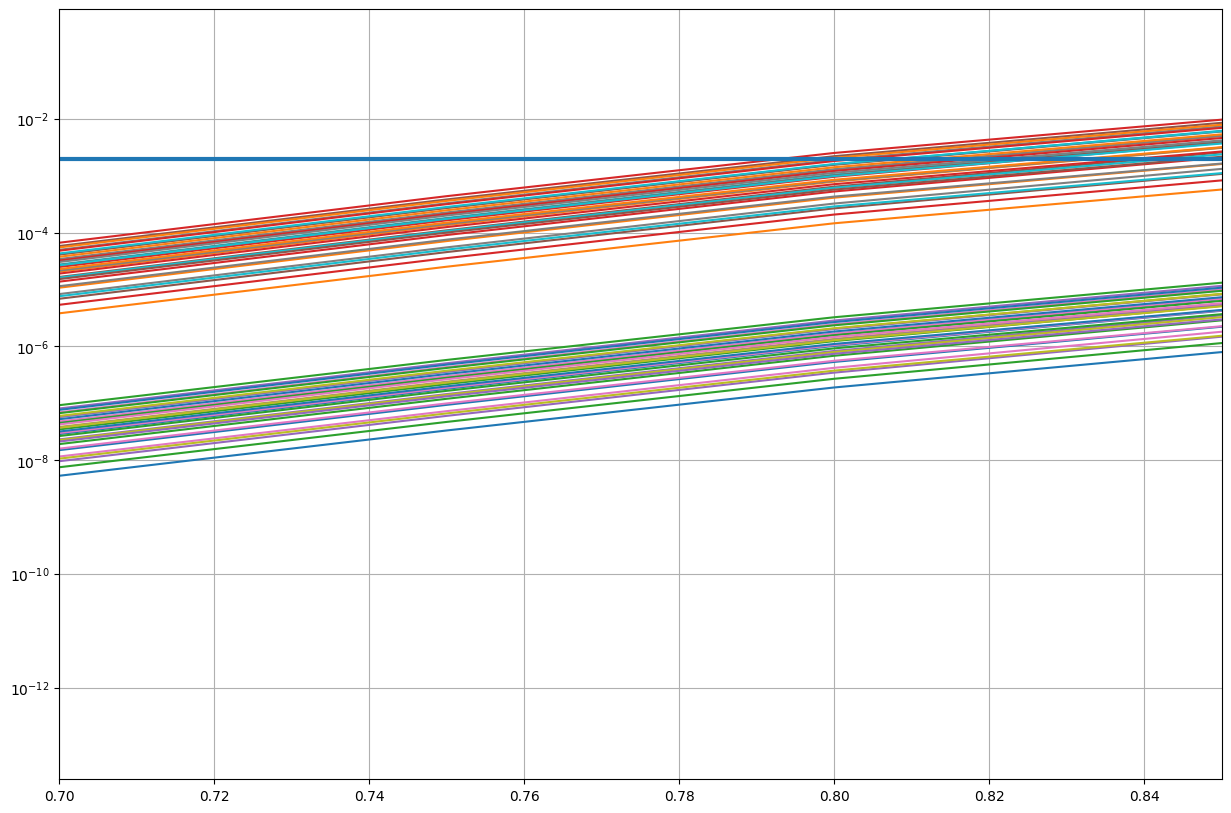

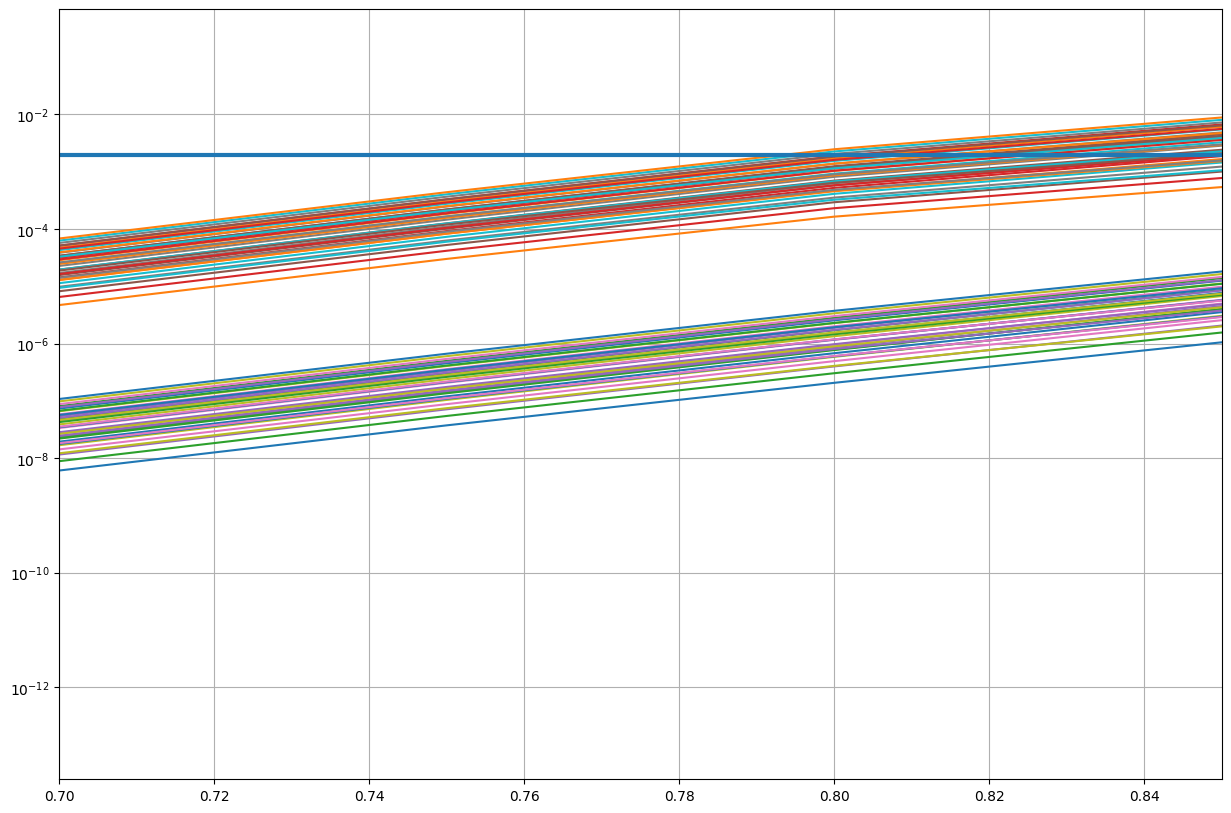

In [8]:
num1 = len(nx_l)*len(ex_l)
plt.figure(figsize = (15,10))
for i in range(1,num1+1):
    plt.semilogy(sg13g2l_el1[:,0], sg13g2l_el1[:,i])
    plt.semilogy(sg13g2l_el1[:,0], sg13g2l_el1[:,i+num1])
plt.axhline(y = 2e-3, linewidth = 3)
plt.grid(which = 'both')
plt.xlim(0.7,0.85)
num2 = len(nx_v)*len(ex_v)
plt.figure(figsize = (15,10))
for i in range(1,num2+1):
    plt.semilogy(sg13g2v_el1[:,0], sg13g2v_el1[:,i])
    plt.semilogy(sg13g2v_el1[:,0], sg13g2v_el1[:,i+num2])
plt.axhline(y = 2e-3, linewidth = 3)
plt.grid(which = 'both')
plt.xlim(0.7,0.85)

In [9]:
el_arr = [4, 9]
nx_varr = [8,4]
dat_arr = [sg13g2l_el1,sg13g2v_el1]
dat_arr_name = ['sg13g2l','sg13g2v']
for j in range(len(el_arr)):
    plt.figure(figsize = (18,6),constrained_layout=True)
    # plt.title('Bipolar transistor npn13g2',fontsize = 18)
    plt.suptitle(r'Gummel plot at $V_{BE} = V_{CE}$ (%s)'%dat_arr_name[j], fontsize = 20) 
    for i in range(1,len(nx[j])+1):
        for k in range(1,len(ex[j])+1):
        ib_ind = i + 3*
        plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i]*1e3, color = colors[i-1], linestyle = 'dashed', label = f'El = {1 +(i-1)*0.5} $\mu m$', lw = 0.5 + 0.2*i)
        # plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i+el_arr[j]]*1e3, color = colors[i-1], lw = 0.5 + 0.2*i)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current $I_C$, $I_B$ (mA)',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    # plt.xlim(0.75,0.9)
    # plt.ylim(1e-5,15)
    plt.grid(True, which = 'both')
    plt.legend(fontsize = 15, loc = 'upper left')
    
    plt.show()

IndentationError: expected an indented block (3710579320.py, line 11)

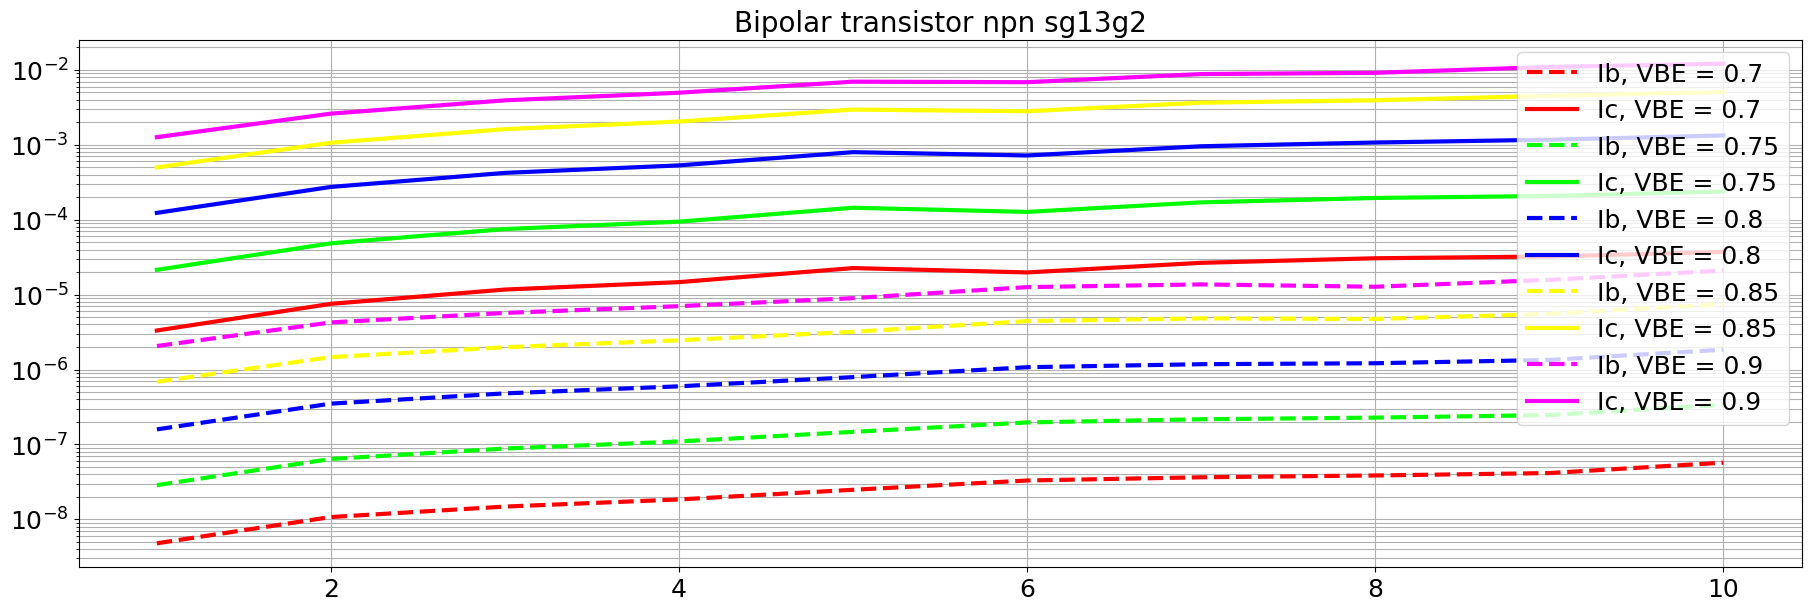

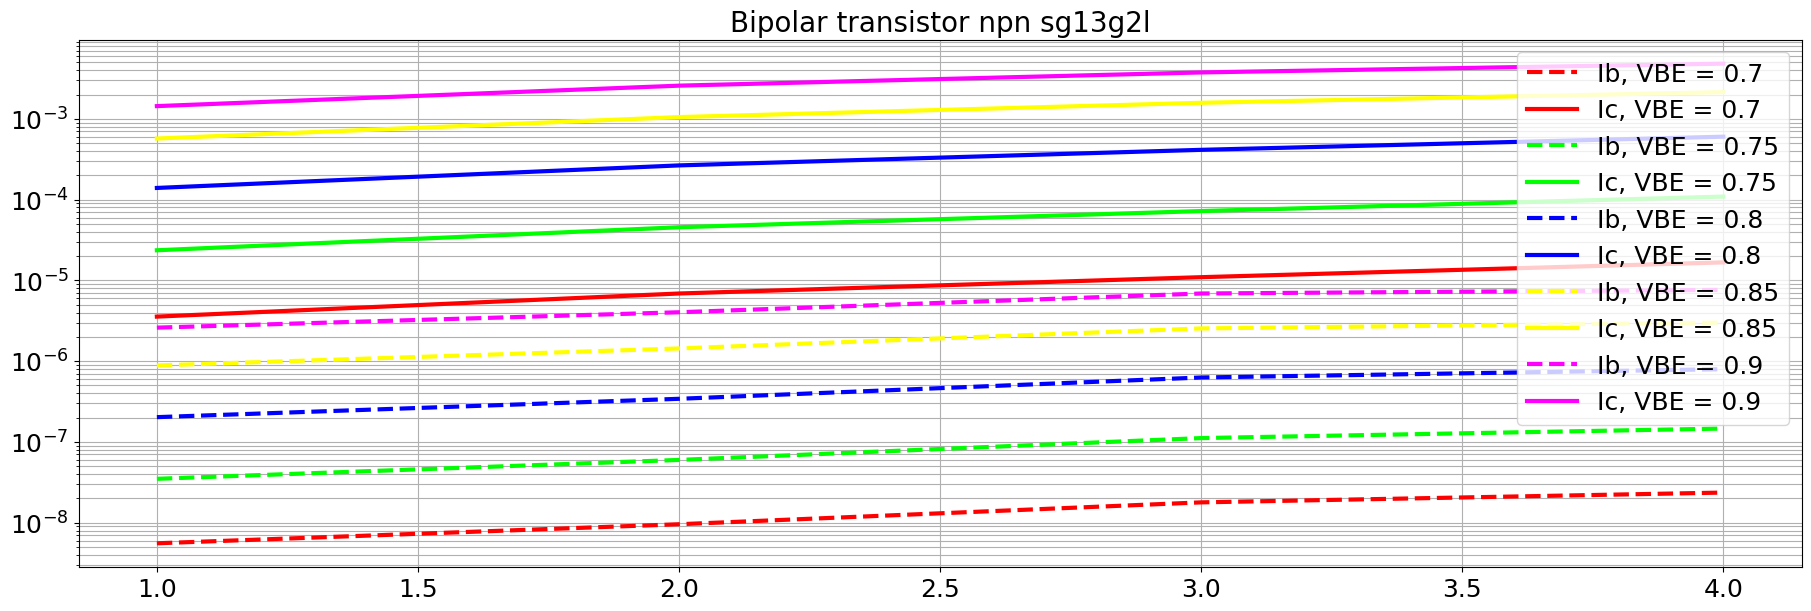

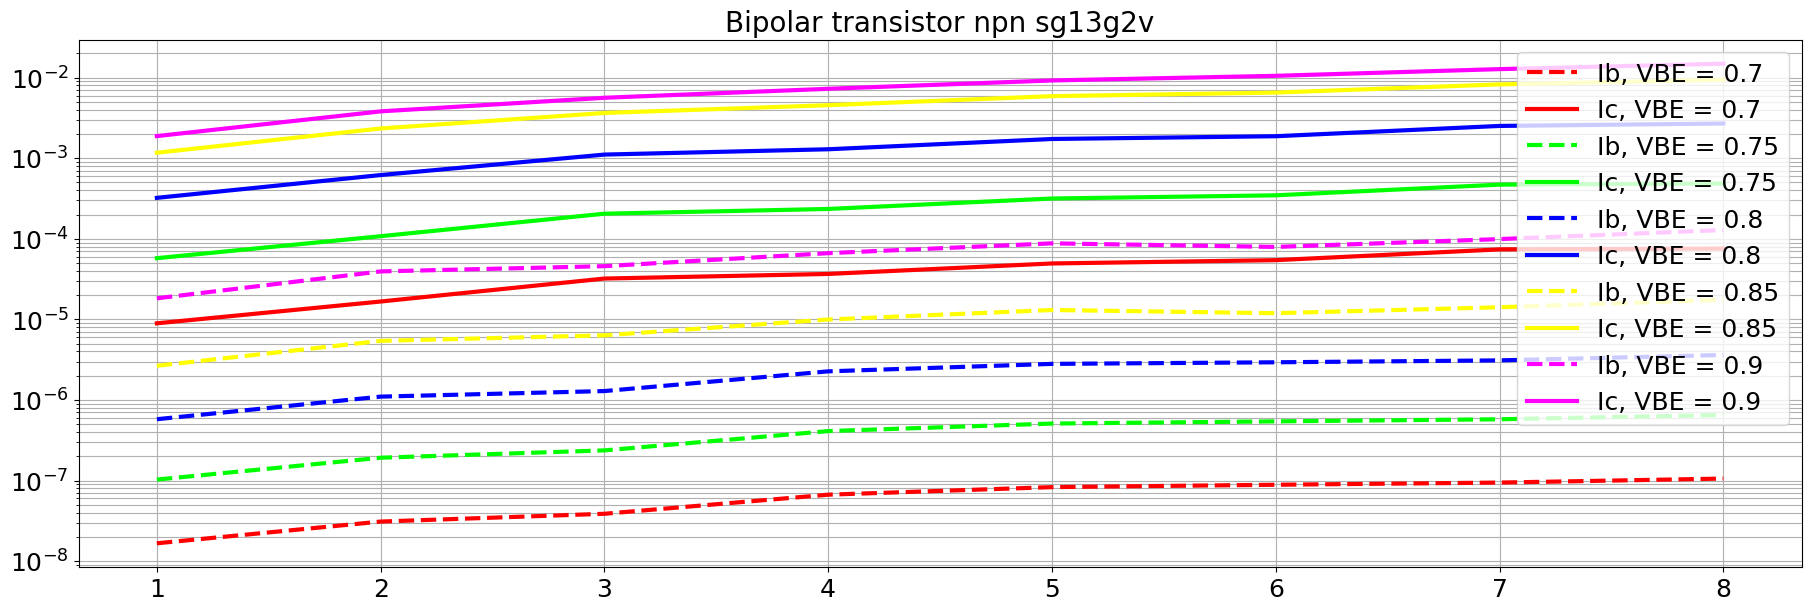

In [10]:
# def plot_dat(data, ind_array, name, size):
#     plt.figure(figsize = size)
#     plt.subplot(211)
#     for i in ind_array:
#         plt.plot(data[:,0], ib1[:,i])
#     plt.plot(data
nx_arr = [nx_g2,nx_g2l,nx_g2v]
dat_arr = [sg13g2,sg13g2l,sg13g2v]
dat_arr_name = ['sg13g2','sg13g2l','sg13g2v']
v_point = [0.7, 0.75, 0.8, 0.85, 0.9]
for j in range(len(nx_arr)):
    plt.figure(figsize = (18,6),constrained_layout=True)
    # plt.title('Bipolar transistor npn13g2',fontsize = 18)
    # plt.subplot(121)
    plt.gca().set_title(f'Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
    # v_index = np.where(dat_arr[j][:,0] == v_point)[0][0]
    # print(v_index)
    for k in range(len(v_point)):
        ib = []
        ic = []
        for i in range(1,nx_arr[j]+1):
            # plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i]*1e3, label = f'Nx = {i}', lw = 0.5 + 0.2*i)
            # plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i+nx_arr[j]]*1e3,linestyle = 'dashed', lw = 0.5 + 0.2*i)
            v_index = np.where(dat_arr[j][:,0] == v_point[k])[0][0]
            ib.append(dat_arr[j][:,i][v_index])
            ic.append(dat_arr[j][:,i+nx_arr[j]][v_index])
        # print(len(dat_arr[j][:,1:-1]))
        x = np.arange(1, len(ib)+1,1)
        # print(x)
        # print(ib)
        plt.semilogy(x,ib,lw = 3, color = colors[k], linestyle = 'dashed', label = f'Ib, VBE = {v_point[k]}')
        plt.semilogy(x,ic,lw = 3, color = colors[k],  label = f'Ic, VBE = {v_point[k]}')
        
        plt.xticks(fontsize = 18)
        plt.yticks(fontsize = 18)
        # plt.xlim(0.6,0.8)
        plt.grid(True, which = 'both')
        plt.legend(fontsize = 18, loc = 'upper right')
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


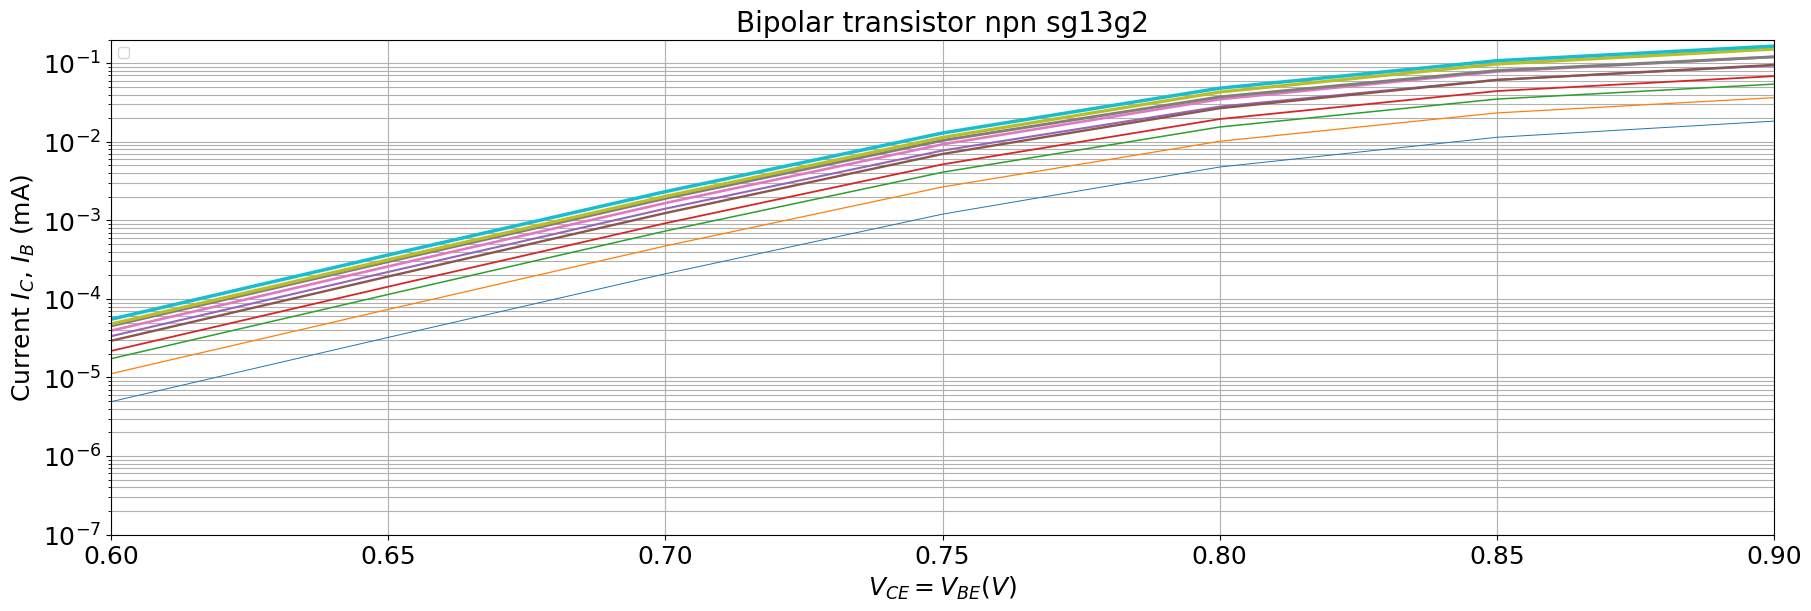

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


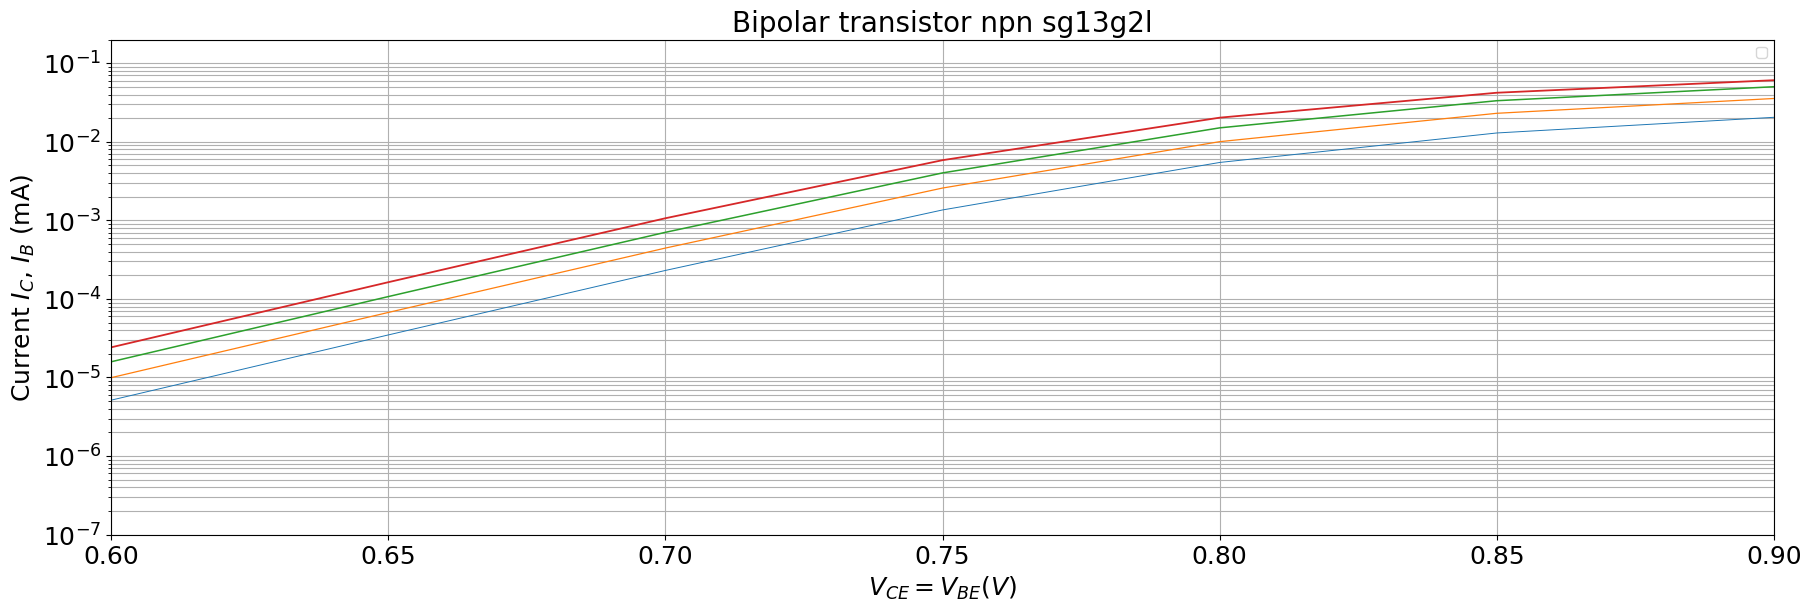

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


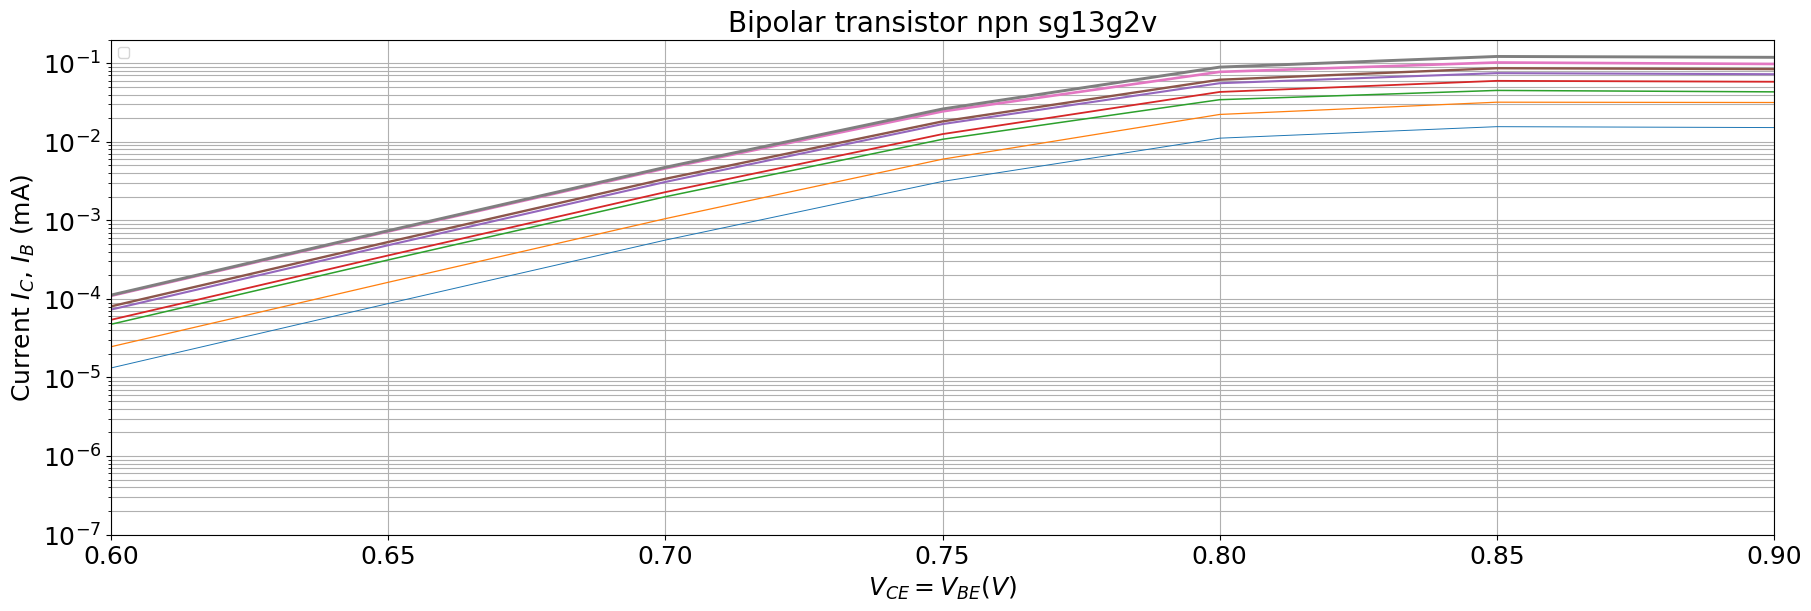

In [11]:
def derivation(x,y):
    step = x[1] - x[0]
    arr = []
    x_new = []
    for i in range(len(y)-1):
        arr.append((y[i+1]-y[i-1])/(2*step))
        x_new.append(x[i])
    return [x_new, arr]


# derivation(dat_arr[0][:,0],dat_arr[j][:,1])      

for j in range(len(nx_arr)):
    plt.figure(figsize = (18,6),constrained_layout=True)
    # # plt.title('Bipolar transistor npn13g2',fontsize = 18)
    # plt.subplot(121)
    plt.gca().set_title(f'Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
    for i in range(1,nx_arr[j]+1):
        # a = derivation(dat_arr[j][:,0],dat_arr[j][:,i])
        # plt.semilogy(a[0], a[1], label = f'Nx = {i}', lw = 0.5 + 0.2*i)
        b = derivation(dat_arr[j][:,0],dat_arr[j][:,i+nx_arr[j]])
        plt.semilogy(b[0], b[1], lw = 0.5 + 0.2*i)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current $I_C$, $I_B$ (mA)',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.xlim(0.6,0.9)
    plt.ylim(1e-7, 2e-1)
    plt.grid(True, which = 'both')
    plt.legend()
    # plt.subplot(122)
    # plt.gca().set_title('thicker line for higher Nx', fontsize = 20)
    # for i in range(1,nx_arr[j]+1):
    #     a = derivation(dat_arr[j][:,0],dat_arr[j][:,i+2*nx_arr[j]])
    #     plt.plot(a[0], a[1], label = f'Nx = {i}', lw = 0.5 + 0.2*i)
    #     # plt.semilogy(dat_arr[j][:,0], dat_arr[j][:,i+2*nx_arr[j]], label = f'Nx = {i}', lw = 0.5 + 0.2*i)
    # plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    # plt.ylabel(r'Current gain $\beta$',fontsize = 18)
    # plt.xticks(fontsize = 18)
    # plt.yticks(fontsize = 18)
    # plt.grid(True, which = 'both')
    # plt.legend()
    plt.show()


Overplot them in case m = 1, m=10 and m = 20 (m is number of transistors in parallel)

In [12]:
# num_ind = [1,10,20]
# count = 20
# plt.figure(figsize = (18,6),constrained_layout=True)
# # plt.title('Bipolar transistor npn13g2',fontsize = 18)
# plt.subplot(121)
# # plt.gca().set_title('Bipolar transistor npn sg13g2',fontsize = 20)
# for i in (num_ind):
#     plt.plot(ib1[:,0], ib1[:,i]*1e3, label = f'Ib, sg13g2, m = {i}' )
#     plt.plot(ic1[:,0], ic1[:,i]*1e3, label = f'Ic, sg13g2, m = {i}' )
#     plt.plot(ib1[:,0], ib1[:,i+count]*1e3,linestyle = 'dashed', label = f'Ib, sg13g2l, m = {i}')
#     plt.plot(ic1[:,0], ic1[:,i+count]*1e3,linestyle = 'dashed', label = f'Ic, sg13g2l, m = {i}')
#     plt.plot(ib1[:,0], ib1[:,i+count*2]*1e3,linestyle = 'dotted', label = f'Ib, sg13g2v, m = {i}')
#     plt.plot(ic1[:,0], ic1[:,i+count*2]*1e3,linestyle = 'dotted', label = f'Ic, sg13g2v, m = {i}')
# plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
# plt.ylabel(r'Current $I_C$, $I_B$ (mA)',fontsize = 18)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.grid(True, which = 'both')
# plt.xlim(0.8,1.6)
# plt.ylim(0,600)
# plt.legend()
# plt.subplot(122)
# for i in (num_ind):
#     plt.semilogy(beta1[:,0], beta1[:,i], label = f'sg13g2, m = {i}')
#     plt.semilogy(beta1[:,0], beta1[:,i+count],linestyle = 'dashed', label = f'sg13g2l, m = {i}')
#     plt.semilogy(beta1[:,0], beta1[:,i+count*2],linestyle = 'dotted', label = f'sg13g2v, m = {i}')
#     # plt.loglog( ic1[:,i]        *1e3,beta1[:,i]        ,  label = f'sg13g2, m = {i}')
#     # plt.loglog( ic1[:,i+count]  *1e3,beta1[:,i+count]  , linestyle = 'dashed', label = f'sg13g2l, m = {i}')
#     # plt.loglog( ic1[:,i+count*2]*1e3,beta1[:,i+count*2], linestyle = 'dotted', label = f'sg13g2v, m = {i}')
# plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
# plt.ylabel(r'Current gain $\beta$',fontsize = 18)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.grid(True, which = 'both')
# plt.legend()
# plt.xlim(0.1,1.6)
# plt.show()

## 1.2. Montecarlo simulation for each model

In [13]:
MC_sg13g2 = np.genfromtxt('data_simu/gummel_npn13g2_MC.txt')
MC_sg13g2 = MC_sg13g2[1:-1]
MC_sg13g2l = np.genfromtxt('data_simu/gummel_npn13g2l_MC.txt')
MC_sg13g2l = MC_sg13g2l[1:-1]
MC_sg13g2v = np.genfromtxt('data_simu/gummel_npn13g2v_MC.txt')
MC_sg13g2v = MC_sg13g2v[1:-1]


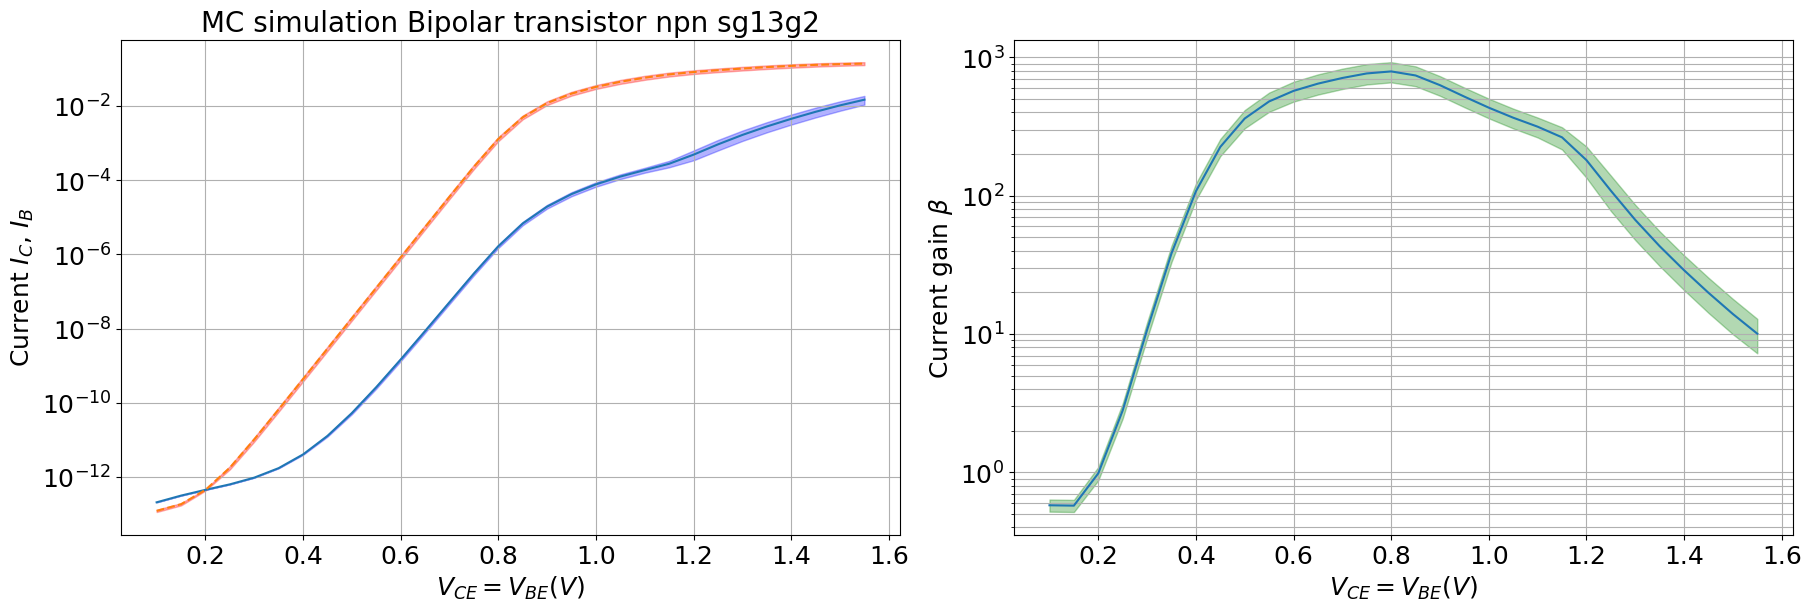

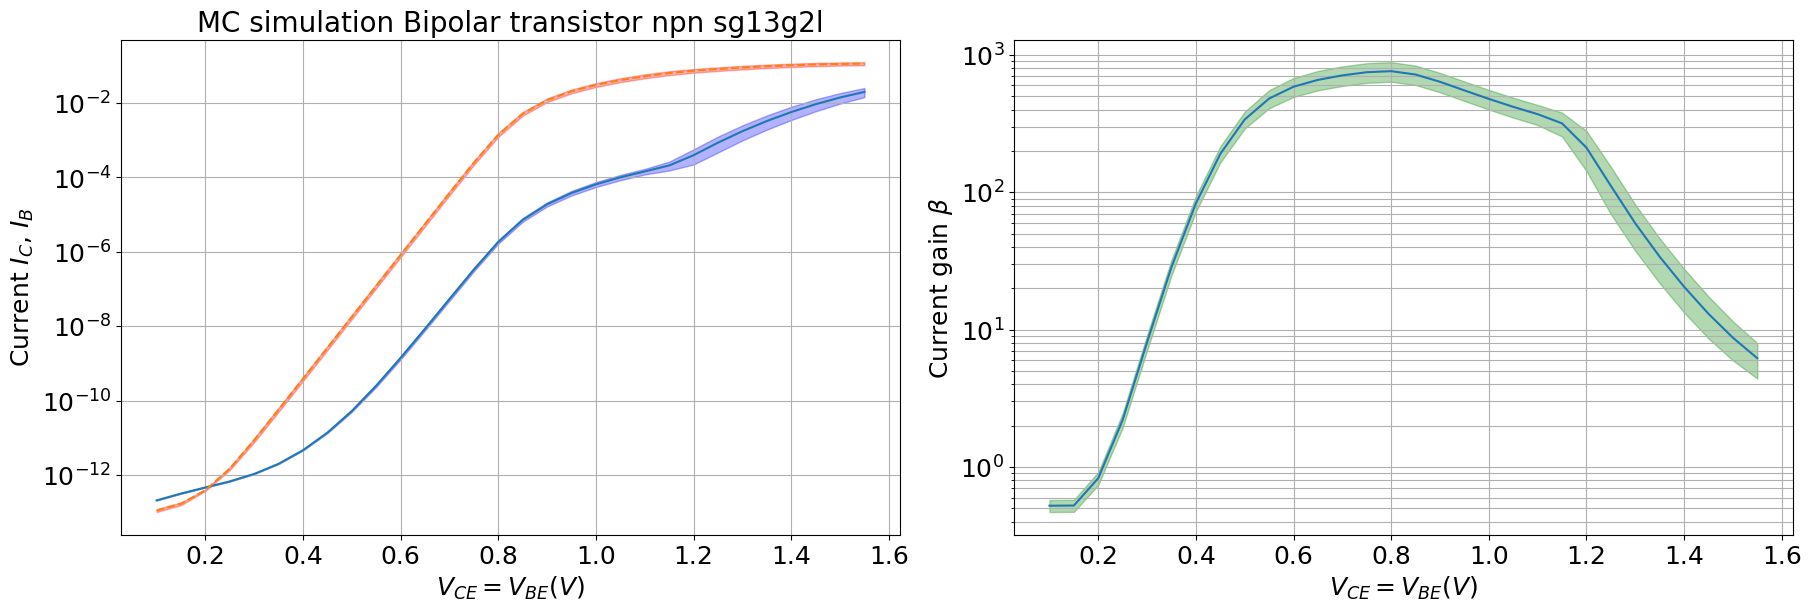

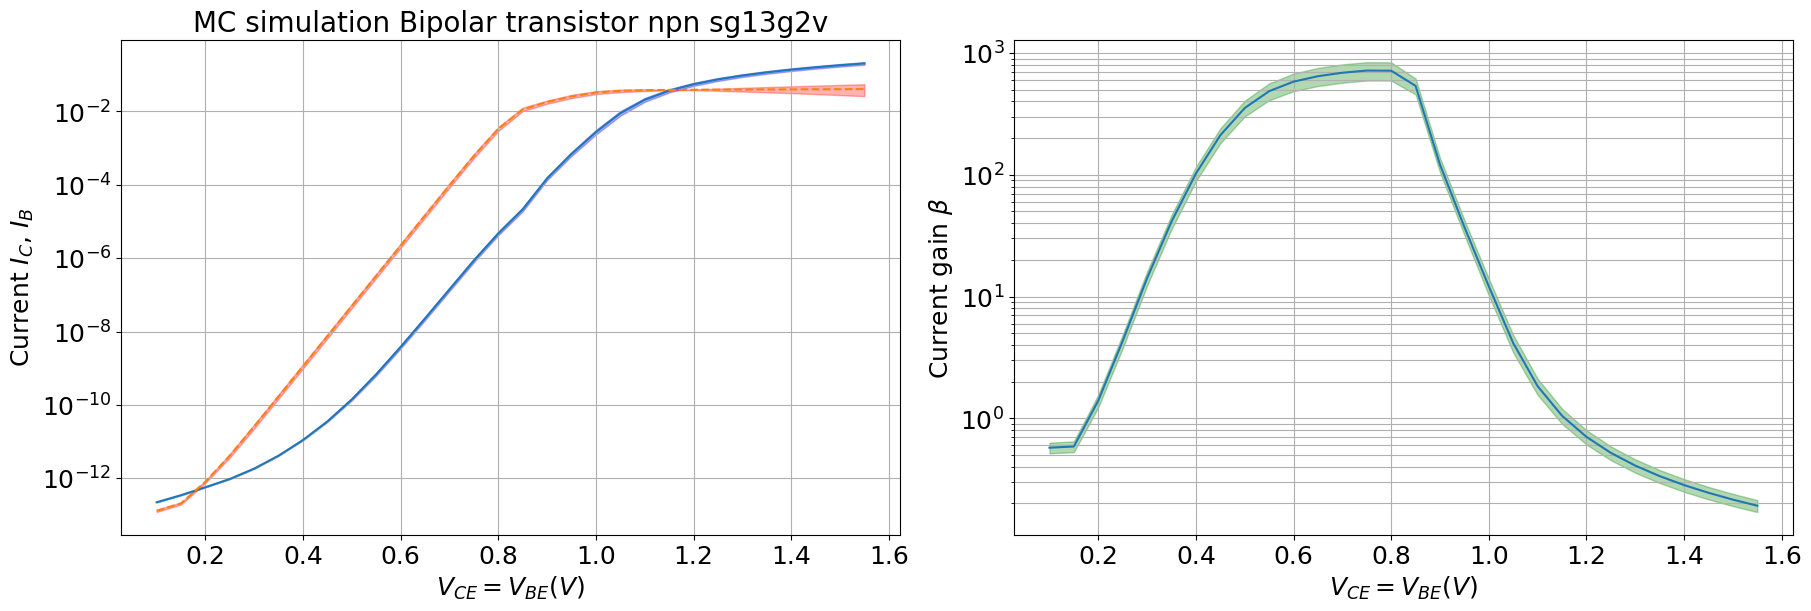

In [14]:
# ic = MC_sg13g2[:,100:200]
# ib = MC_sg13g2[:,1:100]
# ib_mean = np.mean(ib, axis = 1)
# ib_std = np.std(ib, axis = 1)
# ic_mean = np.mean(ic, axis = 1)
# ic_std = np.std(ic, axis = 1)
# plt.figure()

# plt.plot(MC_sg13g2[:,0], ic_mean)
# plt.fill_between(MC_sg13g2[:,0], ic_mean - ic_std,ic_mean + ic_std, color='r', alpha=0.3)
# plt.yscale('log')
# plt.plot(MC_sg13g2[:,0], ib_mean)
# plt.fill_between(MC_sg13g2[:,0], ib_mean - ib_std,ib_mean + ib_std, color='b', alpha=0.3)
ib_mean_MC = []
ic_mean_MC = []
beta_mean_MC = []
ib_std_MC = []
ic_std_MC = []
beta_std_MC = []
MC_num = 100
dat_arr = [MC_sg13g2,MC_sg13g2l,MC_sg13g2v]
dat_arr_name = ['sg13g2','sg13g2l','sg13g2v']
for j in range(len(dat_arr)):
    plt.figure(figsize = (18,6),constrained_layout=True)
    # plt.title('Bipolar transistor npn13g2',fontsize = 18)
    plt.subplot(121)
    plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
    ib_mean = np.mean(dat_arr[j][:,1:MC_num], axis = 1)
    ib_std = np.std(dat_arr[j][:,1:MC_num], axis = 1)
    ic_mean = np.mean(dat_arr[j][:,MC_num:2*MC_num], axis = 1)
    ic_std = np.std(dat_arr[j][:,MC_num:2*MC_num], axis = 1)
    ib_mean_MC.append(ib_mean)
    ib_std_MC.append(ib_std )
    ic_mean_MC.append(ic_mean)
    ic_std_MC.append(ic_std )
    
    plt.plot(dat_arr[j][:,0], ib_mean)
    plt.fill_between(dat_arr[j][:,0], ib_mean + ib_std, ib_mean - ib_std, color = 'b', alpha = 0.3)
    plt.plot(dat_arr[j][:,0],ic_mean,linestyle = 'dashed')
    plt.fill_between(dat_arr[j][:,0], ic_mean + ic_std, ic_mean - ic_std, color = 'r', alpha = 0.3)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current $I_C$, $I_B$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.yscale('log')
    plt.subplot(122)
    beta_mean = np.mean(dat_arr[j][:,2*MC_num:3*MC_num], axis = 1)
    beta_std = np.std(dat_arr[j][:,2*MC_num:3*MC_num], axis = 1)
    beta_mean_MC.append(beta_mean)
    beta_std_MC.append(beta_std )
    plt.plot(dat_arr[j][:,0], beta_mean)
    plt.fill_between(dat_arr[j][:,0], beta_mean + beta_std, beta_mean - beta_std, color = 'g', alpha = 0.3)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current gain $\beta$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.yscale('log')
    plt.show()


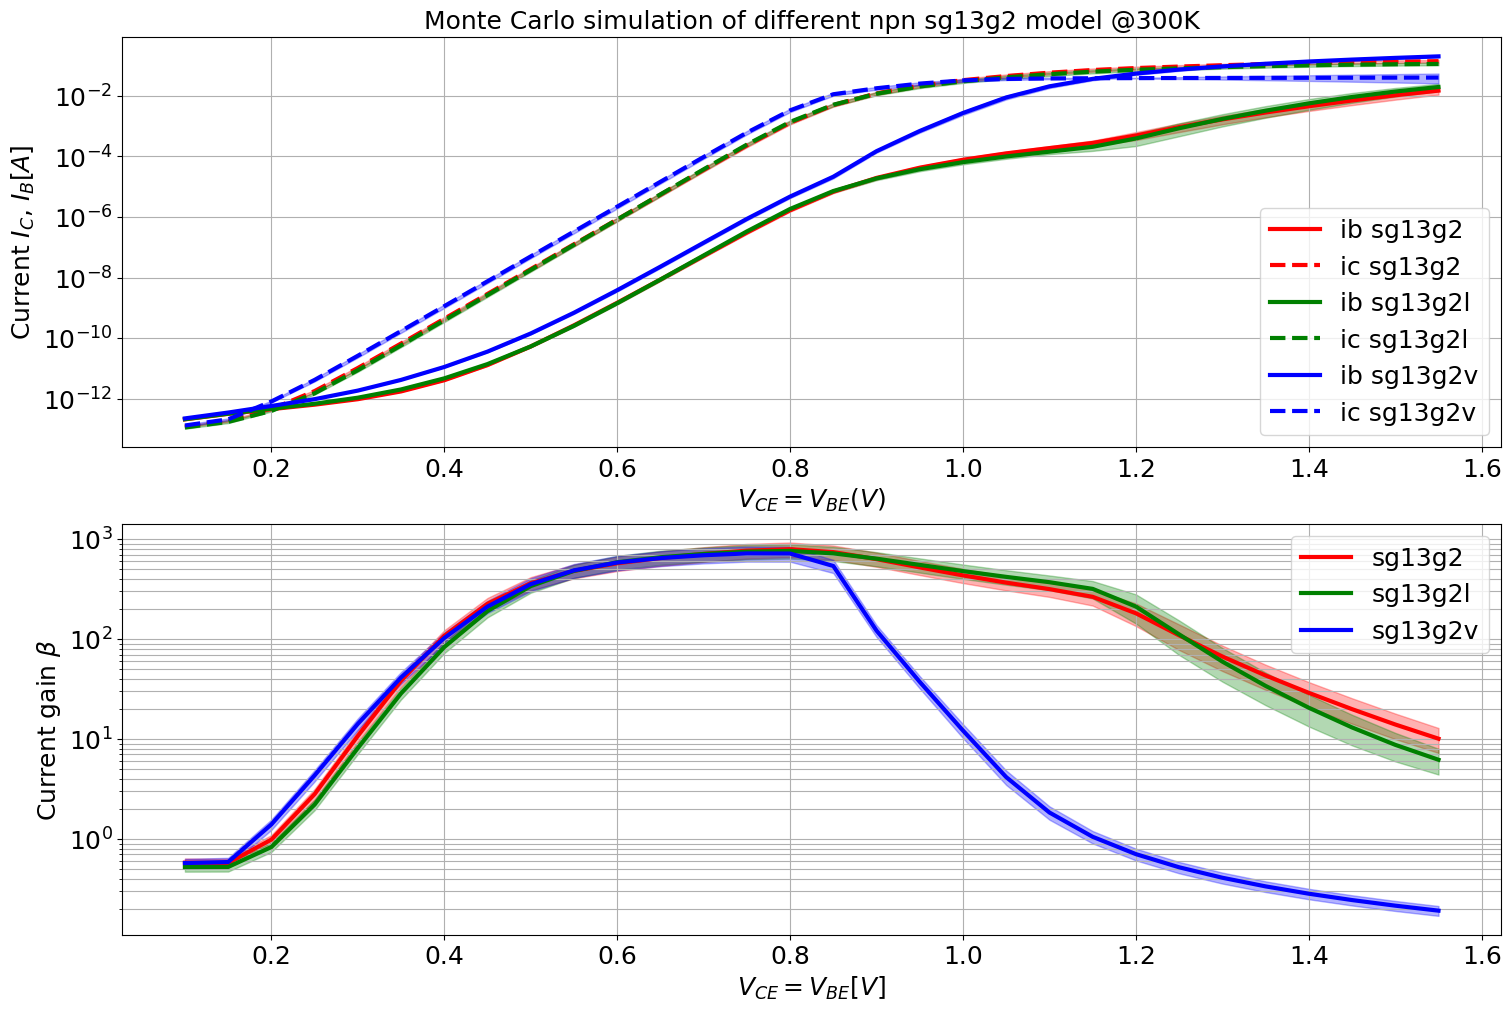

In [15]:
col = ['r','g','b']
plt.figure(figsize = (15,10),constrained_layout=True)

# plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
plt.subplot(211)
plt.gca().set_title('Monte Carlo simulation of different npn sg13g2 model @300K',fontsize = 18)
for i in range(len(ib_mean_MC)):
    plt.plot(dat_arr[j][:,0], ib_mean_MC[i], color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ib_mean_MC[i] + ib_std_MC[i], ib_mean_MC[i] - ib_std_MC[i], color = col[i], alpha = 0.3)
    plt.plot(dat_arr[j][:,0],ic_mean_MC[i],linestyle = 'dashed', color = col[i], lw = 3, label = f'ic {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ic_mean_MC[i] + ic_std_MC[i], ic_mean_MC[i] - ic_std_MC[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
plt.ylabel(r'Current $I_C$, $I_B [A]$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'lower right')
plt.subplot(212)  
# plt.figure(figsize = (15,10),constrained_layout=True)
for i in range(len(ib_mean_MC)):
    plt.plot(dat_arr[j][:,0], beta_mean_MC[i],color = col[i], lw = 3, label = f'{dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], beta_mean_MC[i] + beta_std_MC[i], beta_mean_MC[i] - beta_std_MC[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} [V]$',fontsize = 18)
plt.ylabel(r'Current gain $\beta$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'upper right')
plt.savefig('plot/npn_sg13g2_gummel.png')
plt.show()

The model ```sg13g2v``` seems very different from the other, it could because of the difference in emitter area, that leads to different current density. We can propose otherway to make them in a quite similar condition. In this case is the similar emitter's area

$$ A_E = N_x (E_l \times Ew) $$

where $N_X$ is the number of emitter in a row, $E_l$ and $E_w$ are the emitter length and width.

* Since ```npn13g2v``` has $E_{l,min} = 1 \mu m$, that means we have to modify params from other device to have the same emitter area. So $A_{e,f} = 0.12 \times 1 /mu m^2$
* The model ```npn13g2``` has fixed $A_e = 0.07 \times 0.09 \mu m^2 $ and has maximum $N_x = 10$, we can try to have 2 ```npn13g2``` with $N_x = 9$ in parallels to have emitter area approximate $A_{e,f}$
* The model ```npn13g2l``` has changable $E_l$ with $E_{l,max} = 2.5 \mu m$, we can try to have ```npn13g2l``` with $E_l = 1.7 \mu m$ w emitter area approximate $A_{e,f}$

In [16]:
MC_sg13g21 = np.genfromtxt('data_simu/gummel_npn13g2_MC1.txt')
MC_sg13g21 = MC_sg13g21[1:-1]
MC_sg13g2l1 = np.genfromtxt('data_simu/gummel_npn13g2l_MC1.txt')
MC_sg13g2l1 = MC_sg13g2l1[1:-1]
MC_sg13g2v1 = np.genfromtxt('data_simu/gummel_npn13g2v_MC1.txt')
MC_sg13g2v1 = MC_sg13g2v1[1:-1]


In [17]:
ib_mean_MC1 = []
ic_mean_MC1 = []
beta_mean_MC1 = []
ib_std_MC1 = []
ic_std_MC1 = []
beta_std_MC1 = []
MC_num = 100
dat_arr = [MC_sg13g21,MC_sg13g2l1,MC_sg13g2v1]
dat_arr_name = ['sg13g2','sg13g2l','sg13g2v']
for j in range(len(dat_arr)):
    ib_mean = np.mean(dat_arr[j][:,1:MC_num], axis = 1)
    ib_std = np.std(dat_arr[j][:,1:MC_num], axis = 1)
    ic_mean = np.mean(dat_arr[j][:,MC_num:2*MC_num], axis = 1)
    ic_std = np.std(dat_arr[j][:,MC_num:2*MC_num], axis = 1)
    ib_mean_MC1.append(ib_mean)
    ib_std_MC1.append(ib_std )
    ic_mean_MC1.append(ic_mean)
    ic_std_MC1.append(ic_std )
    beta_mean = np.mean(dat_arr[j][:,2*MC_num:3*MC_num], axis = 1)
    beta_std = np.std(dat_arr[j][:,2*MC_num:3*MC_num], axis = 1)
    beta_mean_MC1.append(beta_mean)
    beta_std_MC1.append(beta_std )


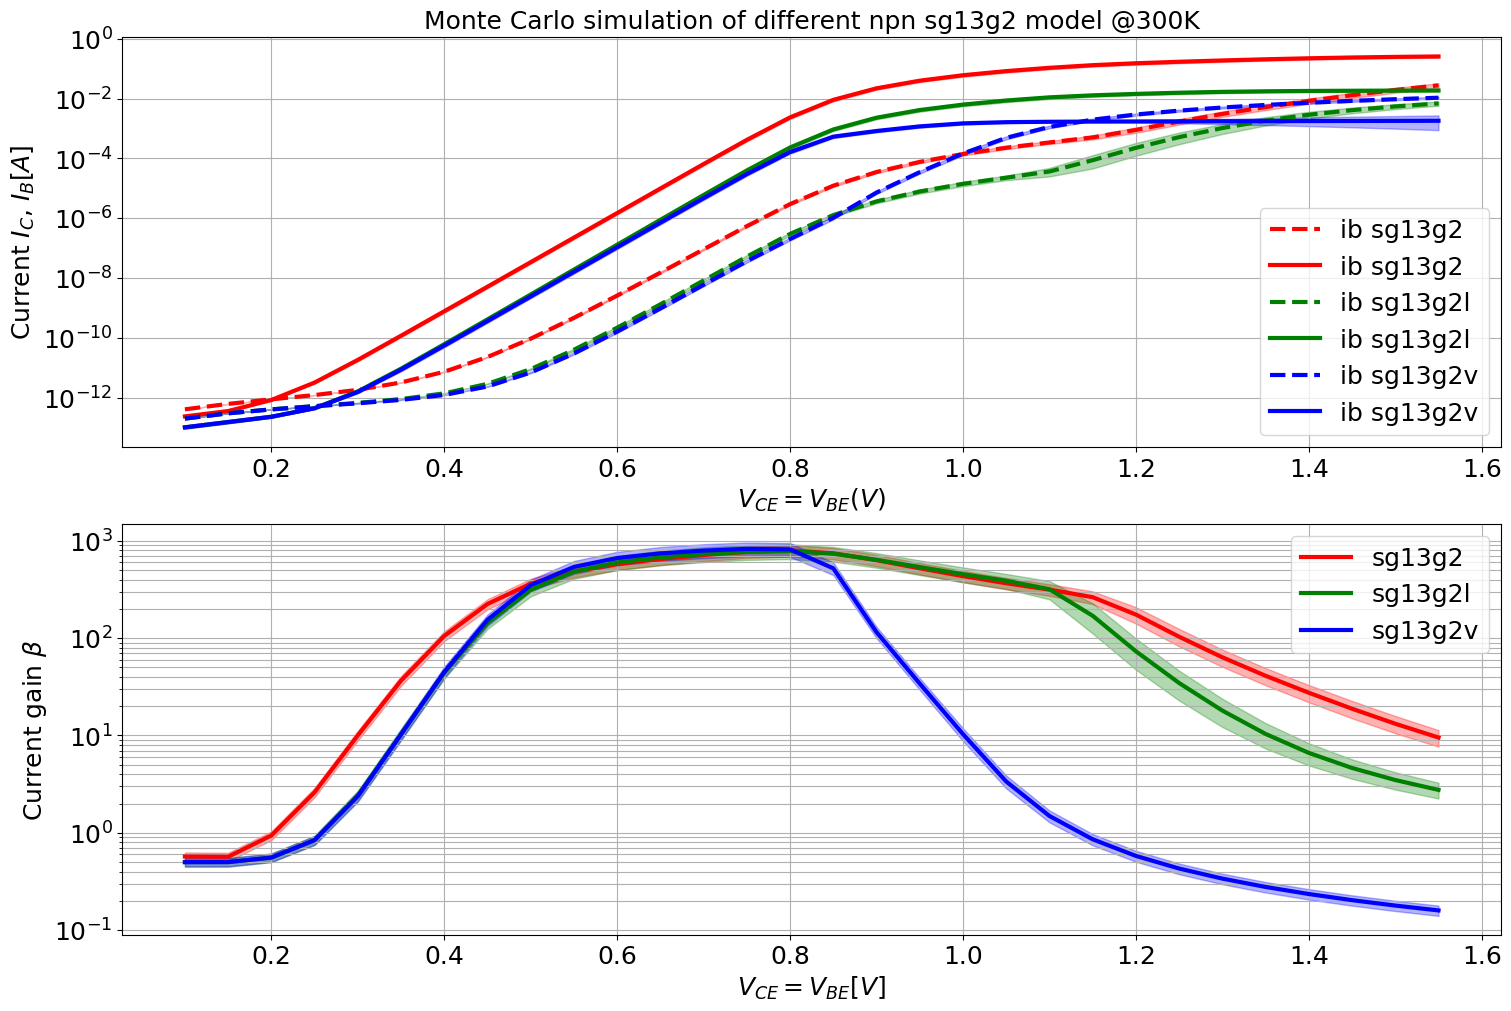

In [18]:
col = ['r','g','b']
plt.figure(figsize = (15,10),constrained_layout=True)

# plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
plt.subplot(211)
plt.gca().set_title('Monte Carlo simulation of different npn sg13g2 model @300K',fontsize = 18)
for i in range(len(ib_mean_MC)):
    plt.plot(dat_arr[j][:,0], ib_mean_MC1[i],linestyle = 'dashed', color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ib_mean_MC1[i] + ib_std_MC1[i], ib_mean_MC1[i] - ib_std_MC1[i], color = col[i], alpha = 0.3)
    plt.plot(dat_arr[j][:,0],ic_mean_MC1[i], color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ic_mean_MC1[i] + ic_std_MC1[i], ic_mean_MC1[i] - ic_std_MC1[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
plt.ylabel(r'Current $I_C$, $I_B [A]$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'lower right')
plt.subplot(212)  
# plt.figure(figsize = (15,10),constrained_layout=True)
for i in range(len(ib_mean_MC1)):
    plt.plot(dat_arr[j][:,0], beta_mean_MC1[i],color = col[i], lw = 3, label = f'{dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], beta_mean_MC1[i] + beta_std_MC1[i], beta_mean_MC1[i] - beta_std_MC1[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} [V]$',fontsize = 18)
plt.ylabel(r'Current gain $\beta$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'upper right')
plt.savefig('plot/npn_sg13g2_gummel1.png')
plt.show()

### 1.2.1. Plot beta vs current density instead of beta vs current

In [19]:
Aeg2 = 18 * 0.07e-6 * 0.09e-6
Aeg2l = 0.07e-6 * 1.7e-6
Aeg2v = 0.12e-6 * 1e-6
Ae_arr = [Aeg2, Aeg2l, Aeg2v]


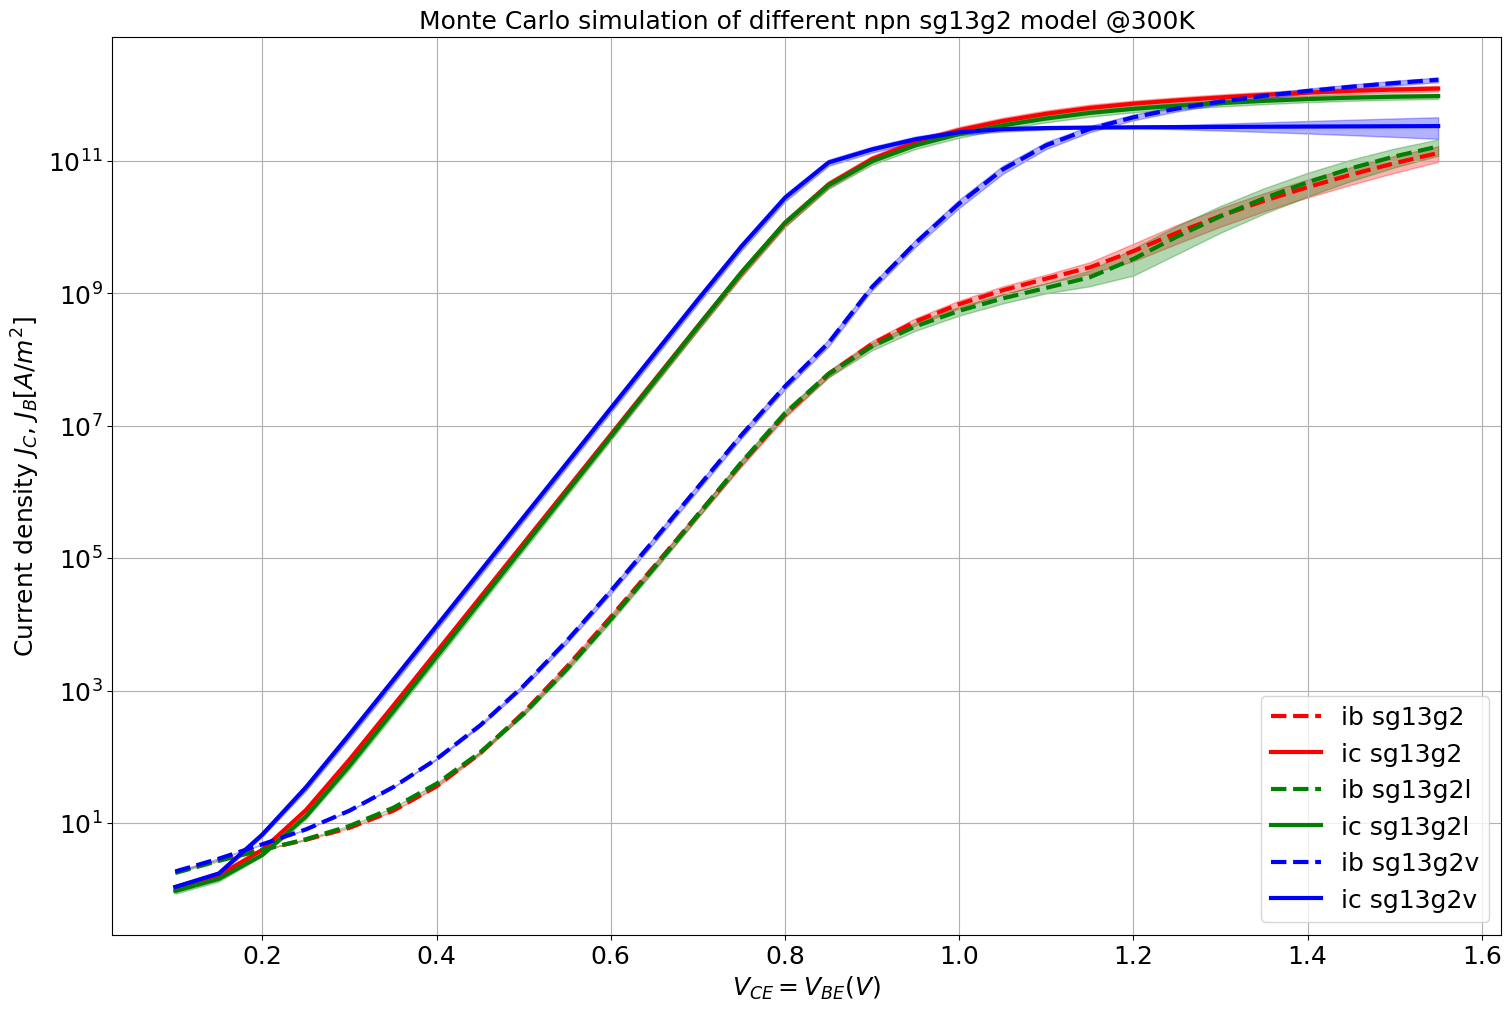

In [20]:
col = ['r','g','b']
plt.figure(figsize = (15,10),constrained_layout=True)

# plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
# plt.subplot(211)
plt.gca().set_title('Monte Carlo simulation of different npn sg13g2 model @300K',fontsize = 18)
for i in range(len(ib_mean_MC)):
    plt.plot(dat_arr[j][:,0], ib_mean_MC[i]/Ae_arr[i], linestyle = 'dashed', color = col[i], lw = 3, label = f'ib {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ib_mean_MC[i]/Ae_arr[i] + ib_std_MC[i]/Ae_arr[i], ib_mean_MC[i]/Ae_arr[i] - ib_std_MC[i]/Ae_arr[i], color = col[i], alpha = 0.3)
    plt.plot(dat_arr[j][:,0],ic_mean_MC[i]/Ae_arr[i], color = col[i], lw = 3, label = f'ic {dat_arr_name[i]}')
    plt.fill_between(dat_arr[j][:,0], ic_mean_MC[i]/Ae_arr[i] + ic_std_MC[i]/Ae_arr[i], ic_mean_MC[i]/Ae_arr[i] - ic_std_MC[i]/Ae_arr[i], color = col[i], alpha = 0.3)
plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
plt.ylabel(r'Current density $J_C$, $J_B [A/m^2]$',fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True, which = 'both')
plt.yscale('log')
plt.legend(fontsize = 18, loc = 'lower right')
plt.savefig('plot/cur_density_gummel.png')

### 1.2.2. MC simulation in different temperature

In [21]:
#------for temp -196 -153 -53 27 50----------
# MC_sg13g2t = np.genfromtxt('data_simu/gummel_npn13g2_MCtemp.txt')
# MC_sg13g2t = MC_sg13g2t[1:-1]
# MC_sg13g2lt = np.genfromtxt('data_simu/gummel_npn13g2l_MCtemp.txt')
# MC_sg13g2lt = MC_sg13g2lt[1:-1]
# MC_sg13g2vt = np.genfromtxt('data_simu/gummel_npn13g2v_MCtemp.txt')
# MC_sg13g2vt = MC_sg13g2vt[1:-1]
#-----for temp -40 -30 -20 -10 0 10 20 30 ----
MC_sg13g2t = np.genfromtxt('data_simu/gummel_npn13g2_MCtemp1.txt')
MC_sg13g2t = MC_sg13g2t[1:-1]
MC_sg13g2lt = np.genfromtxt('data_simu/gummel_npn13g2l_MCtemp1.txt')
MC_sg13g2lt = MC_sg13g2lt[1:-1]
MC_sg13g2vt = np.genfromtxt('data_simu/gummel_npn13g2v_MCtemp1.txt')
MC_sg13g2vt = MC_sg13g2vt[1:-1]

1. MC simulation with temperature sweep from $-40^{\circ}C$ to $30^{\circ}C$

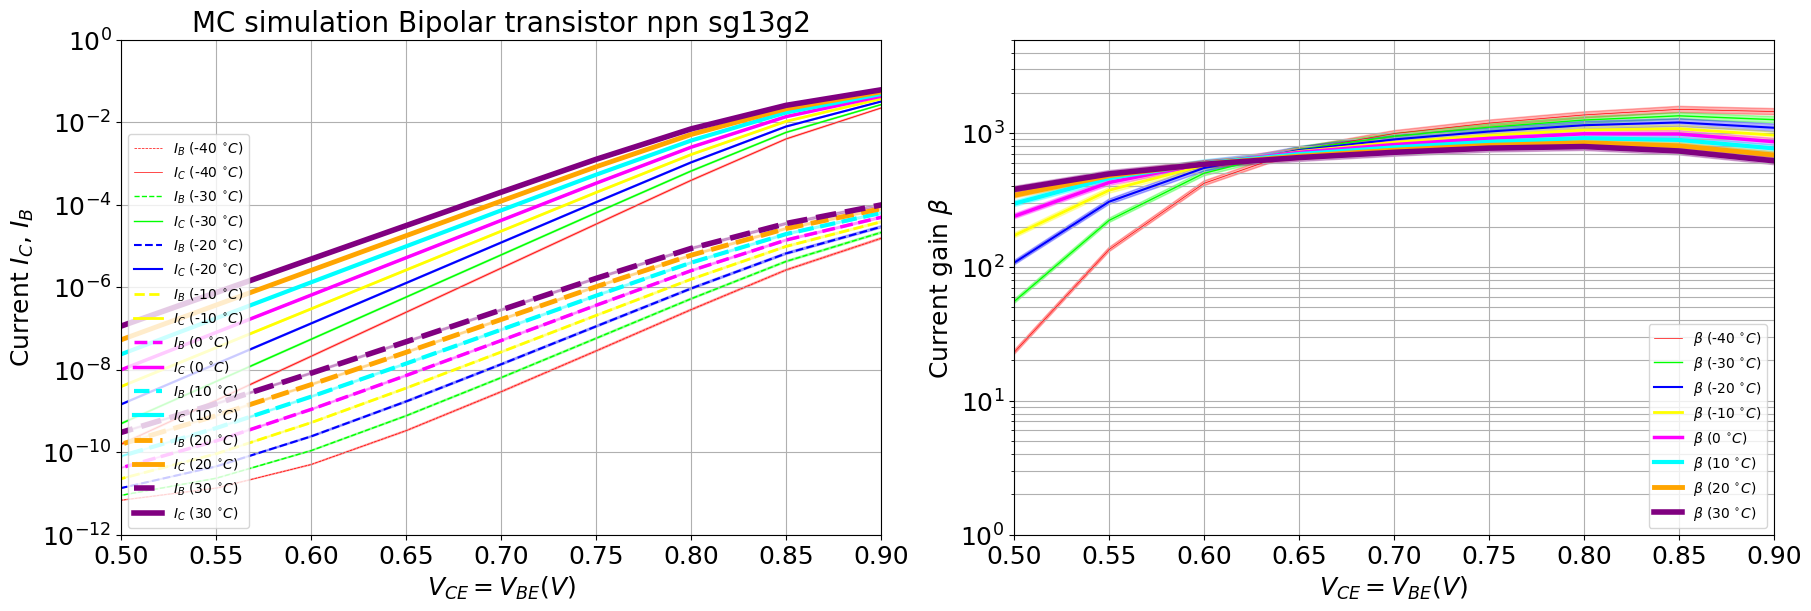

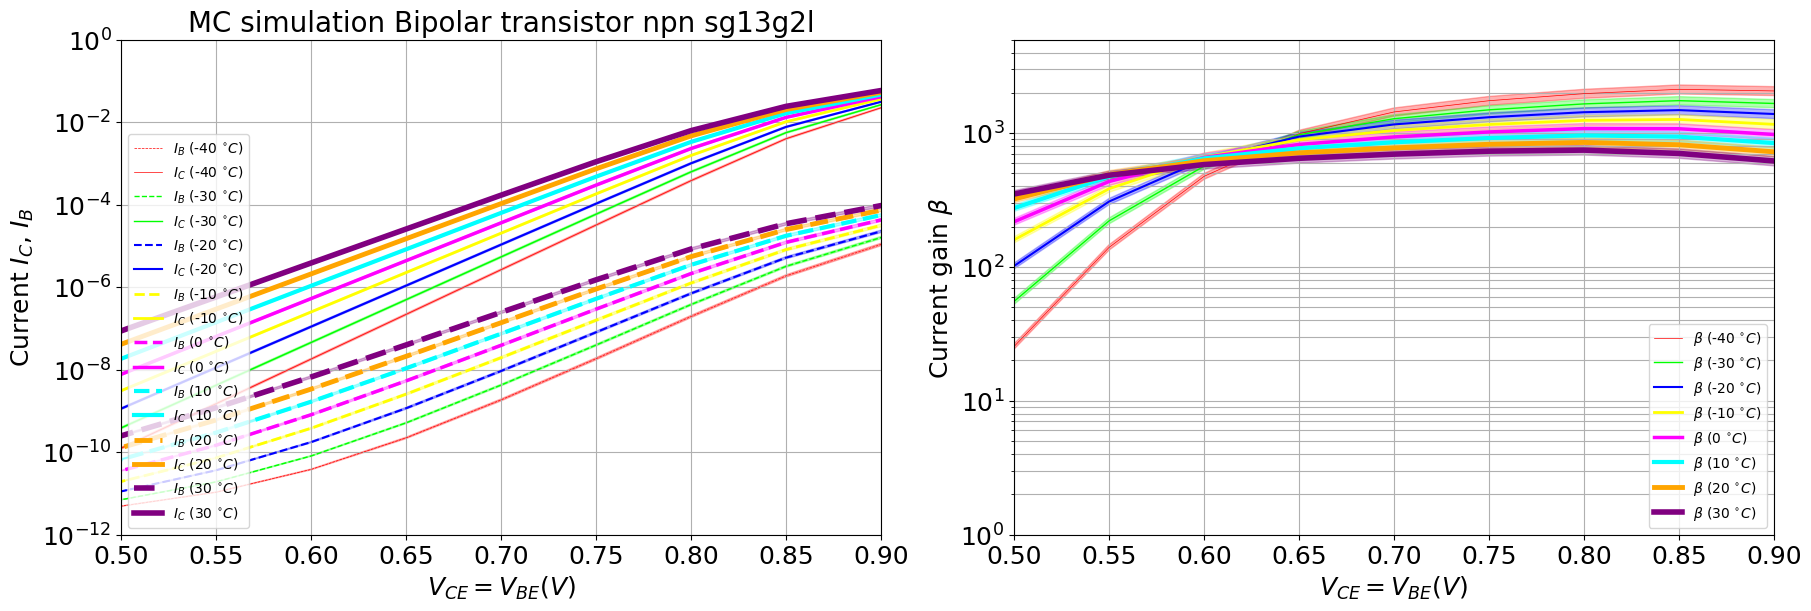

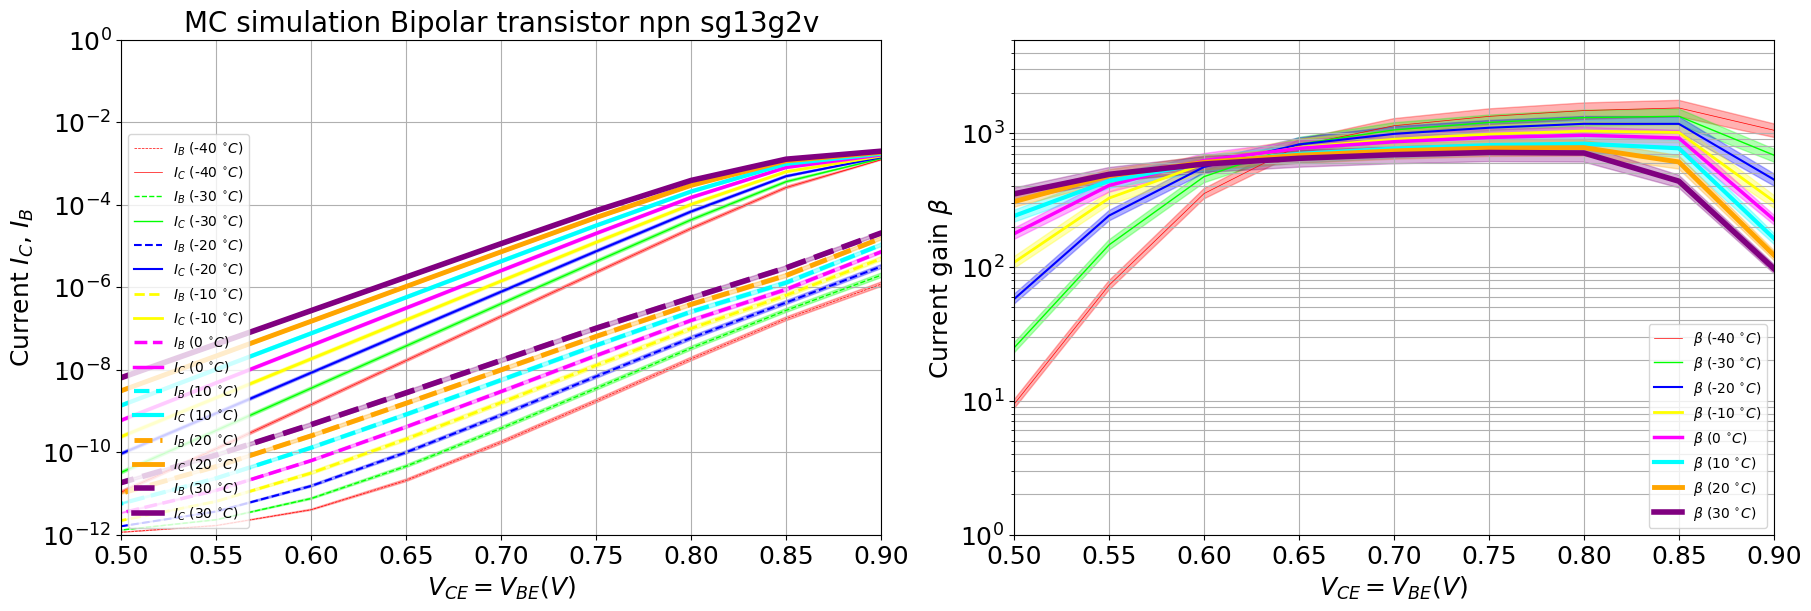

In [22]:
# temp = [-196,-123,-53,27,50]
temp = [-40, -30, -20, -10, 0, 10, 20, 30]
# for i in range(len(temp)):
#     temp[i] = temp[i] + 273
ib_mean_MC = []
ic_mean_MC = []
beta_mean_MC = []
ib_std_MC = []
ic_std_MC = []
beta_std_MC = []
MC_num = 100
temp_diff = len(temp)*MC_num 
dat_arr = [MC_sg13g2t,MC_sg13g2lt,MC_sg13g2vt]
dat_arr_name = ['sg13g2','sg13g2l','sg13g2v']
for j in range(len(dat_arr)):
    plt.figure(figsize = (18,6),constrained_layout=True)
    # plt.title('Bipolar transistor npn13g2',fontsize = 18)
    plt.subplot(121)
    plt.gca().set_title(f'MC simulation Bipolar transistor npn {dat_arr_name[j]}',fontsize = 20)
    for i in range(len(temp)):
        ib_mean = np.mean(dat_arr[j][:,1+i*MC_num:MC_num*(i+1)], axis = 1)
        ib_std = np.std(dat_arr[j][:,1+i*MC_num:MC_num*(i+1)], axis = 1)
        ic_mean = np.mean(dat_arr[j][:,1+i*MC_num+temp_diff:MC_num*(i+1)+temp_diff], axis = 1)
        ic_std =   np.std(dat_arr[j][:,1+i*MC_num+temp_diff:MC_num*(i+1)+temp_diff], axis = 1)
        # ib_mean_MC.append(ib_mean)
        # ib_std_MC.append(ib_std )
        # ic_mean_MC.append(ic_mean)
        # ic_std_MC.append(ic_std )
    
        plt.plot(dat_arr[j][:,0], ib_mean, linestyle = 'dashed',              color = colors[i], lw = 0.5 + 0.5 * i  ,label = r'$I_B$ (%d $^{\circ} C)$'%temp[i])
        plt.fill_between(dat_arr[j][:,0], ib_mean + ib_std, ib_mean - ib_std, color = colors[i], alpha = 0.3)
        plt.plot(dat_arr[j][:,0],ic_mean, color = colors[i], lw = 0.5 + 0.5 * i  ,label = r'$I_C$ (%d $^{\circ} C$)'%temp[i])
        plt.fill_between(dat_arr[j][:,0], ic_mean + ic_std, ic_mean - ic_std, color = colors[i], alpha = 0.3)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current $I_C$, $I_B$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.yscale('log')
    plt.xlim(0.5,0.9)
    plt.ylim(1e-12, 1e0)
    plt.legend(loc = 'lower left')
    plt.subplot(122)
    for i in range(len(temp)):
        beta_mean = np.mean(dat_arr[j][:,1+i*MC_num+2*temp_diff:MC_num*(i+1)+2*temp_diff], axis = 1)
        beta_std =   np.std(dat_arr[j][:,1+i*MC_num+2*temp_diff:MC_num*(i+1)+2*temp_diff], axis = 1)
        # beta_mean_MC.append(beta_mean)
        # beta_std_MC.append(beta_std )
        plt.plot(dat_arr[j][:,0], beta_mean, lw = 0.5 + 0.5 * i, color = colors[i]  ,label = r'$\beta$ (%d $^{\circ} C$)'%temp[i])
        plt.fill_between(dat_arr[j][:,0], beta_mean + beta_std, beta_mean - beta_std, color = colors[i], alpha = 0.3)
    plt.xlabel(r'$V_{CE} = V_{BE} (V)$',fontsize = 18)
    plt.ylabel(r'Current gain $\beta$',fontsize = 18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(True, which = 'both')
    plt.yscale('log')
    plt.legend()
    plt.xlim(0.5,0.9)
    plt.ylim(1e0, 5e3)
    plt.show()

## 2. Noise simulation 

In this section, we will simulate the intrinsic noise of different transistor model

In [44]:
import csv
import os

def csv_to_txt_folder(folder_path):
  """
  Converts all CSV files in a specified folder to TXT files, skipping the header row,
  using spaces as the delimiter.

  Args:
      folder_path (str): The path to the folder containing the CSV files.
  """
  try:
    for filename in os.listdir(folder_path):
      if filename.endswith(".csv"):
        csv_file_path = os.path.join(folder_path, filename)
        txt_file_path = os.path.join(folder_path, os.path.splitext(filename)[0] + ".txt")

        with open(csv_file_path, 'r', newline='', encoding='utf-8') as csvfile, \
             open(txt_file_path, 'w', encoding='utf-8') as txtfile:

          csv_reader = csv.reader(csvfile)
          try:
            next(csv_reader)  # Skip the header row
          except StopIteration:
            print(f"Warning: '{csv_file_path}' is empty or has only a header row.")
            continue #skip to the next file.

          for row in csv_reader:
            txt_row = ' '.join(row)
            txtfile.write(txt_row + '\n')

        print(f"Successfully converted '{csv_file_path}' to '{txt_file_path}' (header skipped)")

  except FileNotFoundError:
    print(f"Error: Folder '{folder_path}' not found.")
  except Exception as e:
    print(f"An error occurred: {e}")


### Plot the base current noise, to confirm with the simulation from the document 

In [45]:
dir_noise_fol = 'noise_spectre'
csv_to_txt_folder(dir_noise_fol)

Successfully converted 'noise_spectre/basecurrentnoise_npn13g2v.csv' to 'noise_spectre/basecurrentnoise_npn13g2v.txt' (header skipped)
Successfully converted 'noise_spectre/basecurrentnoise_npn13g2.csv' to 'noise_spectre/basecurrentnoise_npn13g2.txt' (header skipped)
Successfully converted 'noise_spectre/basecurrentnoise_npn13g2l.csv' to 'noise_spectre/basecurrentnoise_npn13g2l.txt' (header skipped)


In [48]:
# print(np.genfromtxt('noise_spectre/basecurrentnoise_npn13g2v.txt')[0])

In [49]:
file = ['noise_spectre/basecurrentnoise_npn13g2.txt', 'noise_spectre/basecurrentnoise_npn13g2l.txt', 'noise_spectre/basecurrentnoise_npn13g2v.txt']
dat_noise = [[],[],[]]
for i in range(len(dat_noise)):
    dat_noise[i].append(np.genfromtxt(file[i]))

8


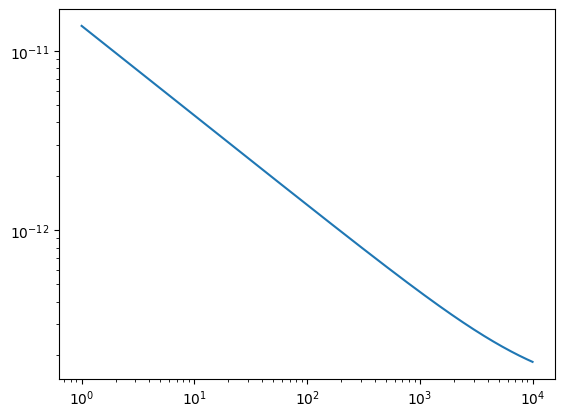

In [96]:
print(np.size(dat_noise[2][0], axis = 1))
plt.loglog(dat_noise[1][0][:,0], dat_noise[1][0][:,1])
# plt.plot(dat_noise[0][:,0], dat_noise[0][:,1])

In [61]:
print(dat_noise[0])

[array([[1.00000e+00, 1.37900e-11, 3.17037e-11, ..., 2.94197e-09,
        5.08323e-09, 8.28272e-09],
       [1.02329e+00, 1.36322e-11, 3.13408e-11, ..., 2.90829e-09,
        5.02504e-09, 8.18791e-09],
       [1.04713e+00, 1.34761e-11, 3.09820e-11, ..., 2.87500e-09,
        4.96752e-09, 8.09418e-09],
       ...,
       [9.54993e+03, 1.86608e-13, 3.77957e-13, ..., 3.02010e-11,
        5.21187e-11, 8.48647e-11],
       [9.77237e+03, 1.85389e-13, 3.74774e-13, ..., 2.98575e-11,
        5.15244e-11, 8.38958e-11],
       [1.00000e+04, 1.84191e-13, 3.71637e-13, ..., 2.95180e-11,
        5.09370e-11, 8.29380e-11]])]


In [53]:
device = 'npn13g2'
type = ['', 'l', 'v']
title = 'Base current noise'
sizing = ['8x0.13x0.96', '4x0.13x2.56', '4x0.18x5.06']
VBE = np.arange(0.7,0.95,0.025)
sub = [131,132,133]

11
11
8


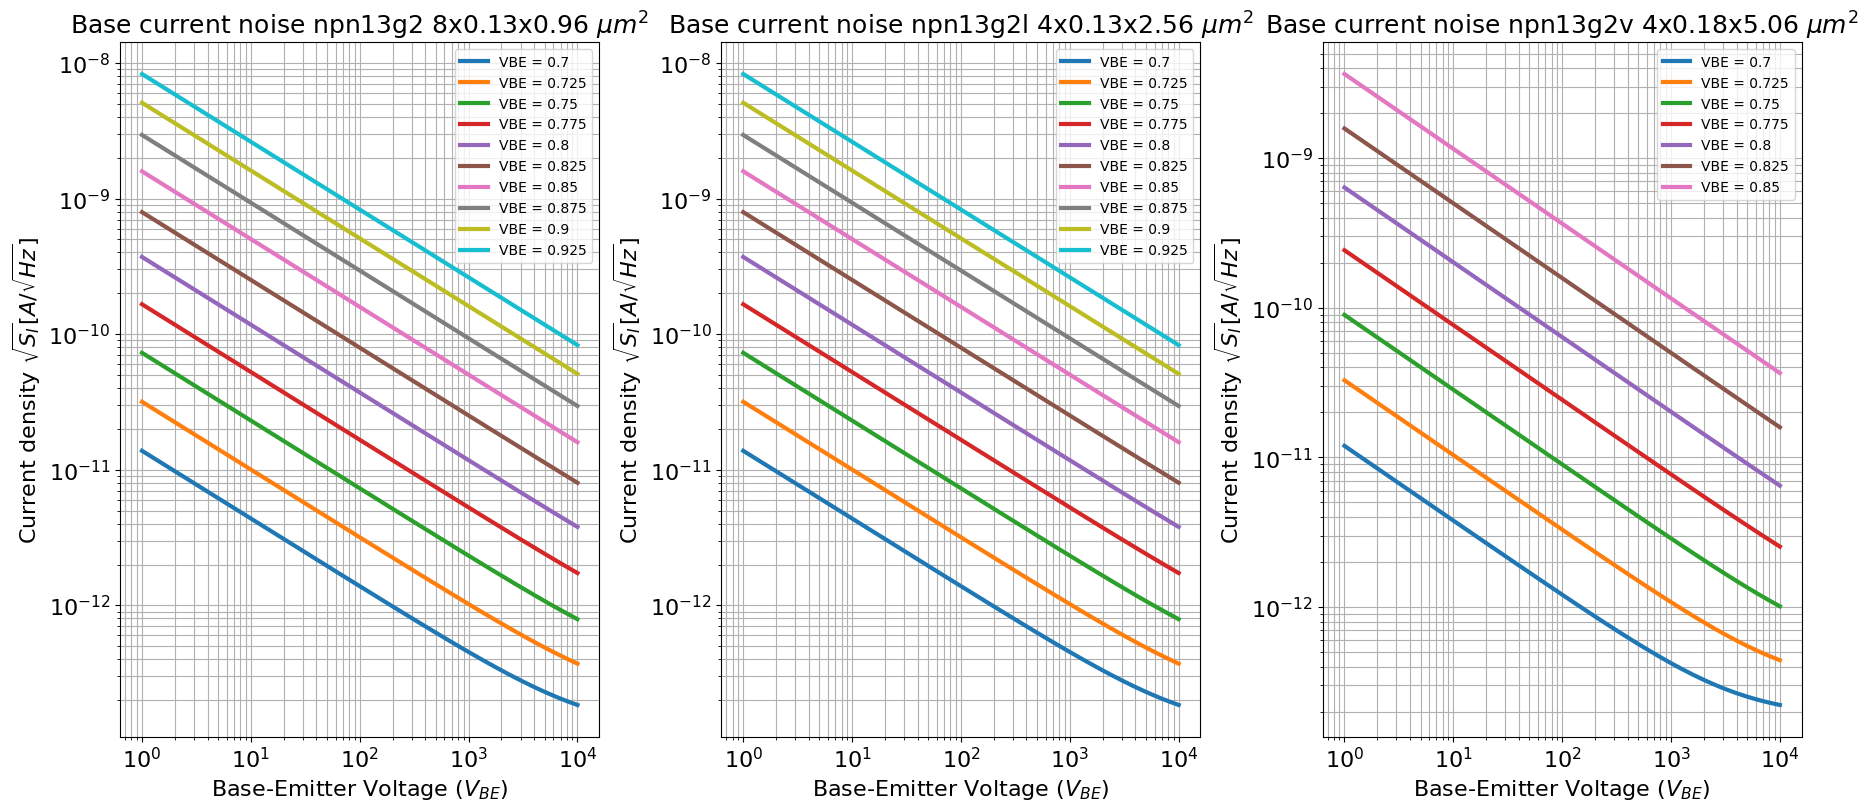

In [113]:
plt.figure(figsize = (18,8) ,constrained_layout=True)
for i in range(len(dat_noise)):
    plt.subplot(sub[i])
    plt.gca().set_title(f'{title} {device}{type[i]} {sizing[i]} $\mu m^2$', fontsize = 18)
    a = np.size(dat_noise[i][0], axis = 1)
    print(a)
    for j in range(a-1):
        plt.loglog(dat_noise[i][0][:,0], dat_noise[i][0][:,j+1], lw = 3, label = f'VBE = {np.round(VBE[j],4)}')
    plt.xlabel(r'Base-Emitter Voltage ($V_{BE}$)', fontsize = 16)
    plt.ylabel(r'Current density $\sqrt{S_I} [A/\sqrt{Hz}]$', fontsize = 16)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.grid(True, which = 'both')
    plt.legend(loc = 'upper right', fontsize = 10)